In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Récupération des données prix crypto sur CoinGecko

In [4]:
import requests
from datetime import datetime

In [5]:
def get_top_cryptos(limit=13):
    url = "https://api.coingecko.com/api/v3/coins/markets"
    params = {
        "vs_currency": "usd",
        "order": "market_cap_desc",
        "per_page": 100, # Récupérer les 100 premières cryptos pour être sûr d'en avoir 15 après filtrage
        "page": 1,
        "sparkline": False,
        "price_change_percentage": "1h,24h,7d,14d,30d,200d,1y"
    }
    response = requests.get(url, params=params)
    data = response.json()

    top_cryptos = []
    excluded_names = ['Tether', 'USD Coin', 'Lido Staked Ether', 'Binance USD','Wrapped Bitcoin','Dai','Shiba Inu']

    for crypto in data:
        if crypto["name"] not in excluded_names:
            top_cryptos.append(crypto)
            if len(top_cryptos) >= limit:
                break

    return top_cryptos

top_15_cryptos = get_top_cryptos()

In [6]:
def get_daily_prices(crypto_id, start_date, end_date):
    start_timestamp = int(datetime.strptime(start_date, "%Y-%m-%d").timestamp())
    end_timestamp = int(datetime.strptime(end_date, "%Y-%m-%d").timestamp())
    url = f"https://api.coingecko.com/api/v3/coins/{crypto_id}/market_chart"
    params = {
        "vs_currency": "usd",
        "days": "max",
        "interval": "daily"
    }
    response = requests.get(url, params=params)
    data = response.json()

    if "prices" not in data:
        print(f"Error: Unexpected API response for {crypto_id}")
        return pd.Series(dtype=float)

    prices = [{"time": datetime.fromtimestamp(x[0] / 1000), "close": x[1]} for x in data["prices"]]
    df = pd.DataFrame(prices)

    if "time" not in df.columns:
        print(f"Error: 'time' column not found in DataFrame for {crypto_id}")
        return pd.Series(dtype=float)

    df.set_index("time", inplace=True)
    df = df.loc[start_date:end_date]

    return df["close"]




In [7]:
start_date = "2017-01-01"
end_date = datetime.now().strftime('%Y-%m-%d')

top_cryptos = get_top_cryptos()
crypto_prices = pd.DataFrame()

for crypto in top_cryptos:
    crypto_id = crypto["id"]
    crypto_symbol = crypto["symbol"].upper()
    crypto_name = crypto["name"]

    prices = get_daily_prices(crypto_id, start_date, end_date)
    crypto_prices[crypto_symbol] = prices

crypto_prices.dropna(inplace=True)

crypto_returns = crypto_prices.pct_change().dropna()

Vérification et analyse des valeurs récupérés

In [8]:
crypto_returns

,BTC,ETH,BNB,XRP,ADA,DOGE,SOL,MATIC,DOT,TRX,LTC,AVAX,UNI
time,,,,,,,,,,,,,
2020-09-23 02:00:00,0.008436,0.007737,0.020980,0.006502,0.013390,0.009615,0.060049,0.036687,0.019220,0.002092,0.028764,0.000000,-0.089962
2020-09-24 02:00:00,-0.028858,-0.066412,-0.050638,-0.053866,-0.059126,-0.039476,-0.035615,-0.096214,-0.036542,-0.008011,-0.034074,-0.339313,0.111156
2020-09-25 02:00:00,0.049174,0.086408,0.074878,0.054832,0.078026,0.036515,0.103906,0.069813,0.093055,0.052053,0.045122,0.310109,0.183210
2020-09-26 02:00:00,-0.004152,0.007197,0.004389,0.036561,0.171711,0.024655,0.019450,0.006786,0.005265,0.039578,0.022277,0.028222,-0.044840
2020-09-27 02:00:00,0.005729,0.008340,0.063051,0.001138,-0.010910,0.000724,-0.017506,-0.010013,-0.016443,0.003750,0.004047,-0.037911,-0.008089
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-08 02:00:00,-0.009565,-0.002726,-0.001205,-0.015446,-0.005706,0.001557,0.000716,-0.009893,0.000852,-0.012812,0.004028,-0.008444,-0.000529
2023-05-09 02:00:00,-0.031969,-0.024241,-0.025961,-0.051404,-0.031594,-0.058074,-0.061164,-0.069323,-0.049622,-0.016654,-0.070891,-0.064771,-0.060184
2023-05-10 02:00:00,-0.003227,-0.001744,-0.005772,0.000905,-0.007012,0.008457,0.000014,-0.027139,-0.009637,0.010274,0.026009,-0.006729,-0.004982


In [9]:
crypto_returns.mean()

BTC      0.001637
ETH      0.002840
BNB      0.004121
XRP      0.002643
ADA      0.003061
DOGE     0.008562
SOL      0.004708
MATIC    0.006795
DOT      0.002104
TRX      0.002212
LTC      0.002010
AVAX     0.003793
UNI      0.002270
dtype: float64

In [10]:
crypto_prices.describe()

,BTC,ETH,BNB,XRP,ADA,DOGE,SOL,MATIC,DOT,TRX,LTC,AVAX,UNI
count,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000
mean,33776.139766,2089.412644,311.816701,0.618676,0.875743,0.126293,55.490001,0.966709,16.740897,0.066612,120.444328,34.030641,13.153897
std,14391.934750,1056.997727,151.892385,0.319114,0.666205,0.105386,59.424289,0.616159,12.521252,0.024306,62.619955,30.154886,9.766648
min,10223.784106,321.077435,22.810300,0.212070,0.076628,0.002520,1.206243,0.012245,3.748835,0.024227,42.971450,2.914066,1.928177
25%,20713.884451,1323.847291,262.381946,0.377860,0.363837,0.061849,14.950212,0.552320,6.237617,0.055628,66.219881,13.660445,5.783550
50%,31943.136468,1826.057477,309.433965,0.497623,0.541135,0.084961,32.467623,0.942842,11.325015,0.064440,104.876201,19.598936,8.350359
75%,44998.181880,2882.048265,401.264722,0.815608,1.283464,0.177964,84.954133,1.393135,25.553181,0.074931,162.447393,51.389490,20.975665
max,67617.015545,4815.004634,675.098974,1.837677,2.967075,0.681842,259.239558,2.881712,54.142860,0.166178,384.671618,134.469747,42.884097


In [11]:
crypto_prices

,BTC,ETH,BNB,XRP,ADA,DOGE,SOL,MATIC,DOT,TRX,LTC,AVAX,UNI
time,,,,,,,,,,,,,
2020-09-22 02:00:00,10439.522489,341.277131,23.533250,0.231657,0.080367,0.002621,2.773660,0.018930,4.089750,0.024937,43.243477,5.284244,4.294819
2020-09-23 02:00:00,10527.587847,343.917547,24.026976,0.233163,0.081443,0.002646,2.940216,0.019625,4.168356,0.024989,44.487314,5.284244,3.908449
2020-09-24 02:00:00,10223.784106,321.077435,22.810300,0.220603,0.076628,0.002542,2.835501,0.017737,4.016036,0.024789,42.971450,3.491229,4.342897
2020-09-25 02:00:00,10726.530083,348.821020,24.518301,0.232699,0.082607,0.002635,3.130126,0.018975,4.389749,0.026079,44.910404,4.573891,5.138561
2020-09-26 02:00:00,10681.993848,351.331567,24.625905,0.241207,0.096791,0.002699,3.191006,0.019104,4.412863,0.027111,45.910860,4.702974,4.908146
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-08 02:00:00,28611.439198,1895.230148,322.308903,0.452959,0.378091,0.077033,22.002452,0.968248,5.655290,0.069539,83.823306,16.491125,5.295646
2023-05-09 02:00:00,27696.760786,1849.288630,313.941569,0.429675,0.366146,0.072559,20.656685,0.901126,5.374661,0.068381,77.880957,15.422986,4.976934
2023-05-10 02:00:00,27607.391681,1846.064264,312.129402,0.430063,0.363578,0.073173,20.656981,0.876670,5.322867,0.069083,79.906535,15.319198,4.952138


In [12]:
import scipy.stats as stats

# Calcul des statistiques descriptives pour chaque crypto-monnaie
stats_summary = pd.DataFrame(index=crypto_returns.columns)

stats_summary['Mean'] = crypto_returns.mean()
stats_summary['Median'] = crypto_returns.median()
stats_summary['Volatility'] = crypto_returns.std()
stats_summary['Skewness'] = crypto_returns.skew()
stats_summary['Kurtosis'] = crypto_returns.kurtosis()

print(stats_summary)


           Mean    Median  Volatility   Skewness    Kurtosis
BTC    0.001637  0.000520    0.035993   0.059914    2.864001
ETH    0.002840  0.002577    0.047040  -0.031716    3.518394
BNB    0.004121  0.001531    0.055619   2.792696   36.491720
XRP    0.002643  0.000497    0.064701   1.489574   14.126905
ADA    0.003061  0.000423    0.055376   0.731098    3.500886
DOGE   0.008562 -0.000800    0.138451  16.119172  375.775871
SOL    0.004708 -0.000299    0.072908   0.422770    4.430028
MATIC  0.006795  0.000191    0.078370   1.887540   10.050024
DOT    0.002104 -0.000828    0.061039   0.648661    6.205026
TRX    0.002212  0.001929    0.048635   0.733340    9.916928
LTC    0.002010  0.001255    0.051652  -0.251178    4.365628
AVAX   0.003793 -0.000073    0.075418   1.527297   13.372557
UNI    0.002270  0.000751    0.065645   0.904730    6.178047


In [13]:
print("Moyenne des moyennes :", stats_summary['Mean'].mean())
print("Moyenne des médianes :", stats_summary['Median'].mean())
print("Moyenne des volatilité :", stats_summary['Volatility'].mean())
print("Moyenne des Skewness :", stats_summary['Skewness'].mean())
print("Moyenne des Kurtosis :", stats_summary['Kurtosis'].mean())

Moyenne des moyennes : 0.0035964163976844993
Moyenne des médianes : 0.0005902325787125846
Moyenne des volatilité : 0.06544972625507053
Moyenne des Skewness : 2.0795306738101704
Moyenne des Kurtosis : 37.753539678887904


D'après les statistiques descriptives des rendements des crypto-monnaies, voici quelques interprétations :

Moyenne (Mean) : DOGE présente la moyenne de rendement la plus élevée parmi les crypto-monnaies, suivie de MATIC et SOL. Cela signifie que DOGE a généré des rendements quotidiens plus élevés en moyenne que les autres crypto-monnaies. Cependant, une moyenne élevée peut aussi être le résultat de quelques jours avec des rendements exceptionnellement élevés, donc il est important de considérer d'autres statistiques pour avoir une image complète.

Médiane (Median) : La médiane donne une meilleure idée de la performance "typique" d'une crypto-monnaie, car elle est moins sensible aux valeurs extrêmes. ETH et TRX ont les médianes les plus élevées, ce qui indique qu'elles ont eu des performances plus régulières.

Volatilité (Volatility) : La volatilité mesure la dispersion des rendements et est souvent utilisée comme indicateur de risque. DOGE a la volatilité la plus élevée parmi les crypto-monnaies, ce qui indique un niveau de risque plus élevé par rapport aux autres actifs. BUSD, en revanche, a la volatilité la plus faible, suggérant un niveau de risque plus faible.

Skewness (Asymétrie) : La skewness mesure l'asymétrie de la distribution des rendements. DOGE présente une skewness extrêmement élevée, ce qui indique que la distribution des rendements est fortement asymétrique avec une queue à droite (c'est-à-dire des rendements extrêmement élevés occasionnels). En revanche, LTC et ETH ont une skewness négative, ce qui suggère une distribution asymétrique avec une queue à gauche (c'est-à-dire des rendements extrêmement faibles occasionnels).

Kurtosis (Aplatissement) : La kurtosis mesure l'épaisseur des queues de la distribution des rendements. Une kurtosis élevée indique que la distribution a des queues plus épaisses et un pic plus pointu que la distribution normale, ce qui suggère un risque plus élevé d'événements extrêmes (gains ou pertes importants). DOGE a une kurtosis extrêmement élevée, indiquant un risque plus élevé d'événements extrêmes par rapport aux autres crypto-monnaies.

En résumé, DOGE présente les rendements moyens les plus élevés, mais aussi la volatilité, l'asymétrie et la kurtosis les plus élevées, ce qui suggère un niveau de risque plus élevé. BUSD a la volatilité la plus faible, indiquant un niveau de risque plus faible. ETH et TRX ont des médianes de rendement élevées, suggérant des performances plus régulières.

Cependant, il est important de noter que ces interprétations sont basées sur des données historiques et ne garantissent pas les performances futures.

Dogecoin (DOGE) est une crypto-monnaie qui a été initialement créée en 2013 comme une parodie des crypto-monnaies populaires de l'époque, en particulier Bitcoin. Elle est basée sur le mème Internet populaire "Doge", qui représente un Shiba Inu, une race de chien japonaise. Dogecoin a été conçu par les développeurs Billy Markus et Jackson Palmer pour être une monnaie numérique accessible et amusante, ainsi qu'un moyen de sensibilisation aux crypto-monnaies.

Dogecoin est basé sur la technologie blockchain, tout comme Bitcoin et d'autres crypto-monnaies. Sa blockchain est décentralisée, ce qui signifie qu'elle n'est contrôlée par aucune autorité centrale. Les transactions Dogecoin sont sécurisées par la preuve de travail (Proof of Work), un mécanisme de consensus utilisé par de nombreuses autres crypto-monnaies. Le protocole de Dogecoin est basé sur le protocole Luckycoin, qui est lui-même dérivé du protocole Litecoin.

Bien que Dogecoin ait été créé à l'origine comme une blague, il a rapidement gagné en popularité et est devenu une crypto-monnaie légitime avec une capitalisation boursière importante. Dogecoin a également été utilisé pour financer divers projets caritatifs et sociaux, ce qui a renforcé son image positive au sein de la communauté des crypto-monnaies.

Au fil des années, Dogecoin a bénéficié d'un soutien important de la part de personnalités influentes, notamment Elon Musk, le PDG de Tesla et SpaceX, qui a régulièrement tweeté et exprimé son intérêt pour la monnaie. Cela a contribué à augmenter la visibilité et la valeur de Dogecoin sur le marché des crypto-monnaies.

Le SHIB ayant des rendements beaucoup trop élevé aplati toutes les autres courbes

Nous allons maintenant tracer les rendements cumulés et les interpréter

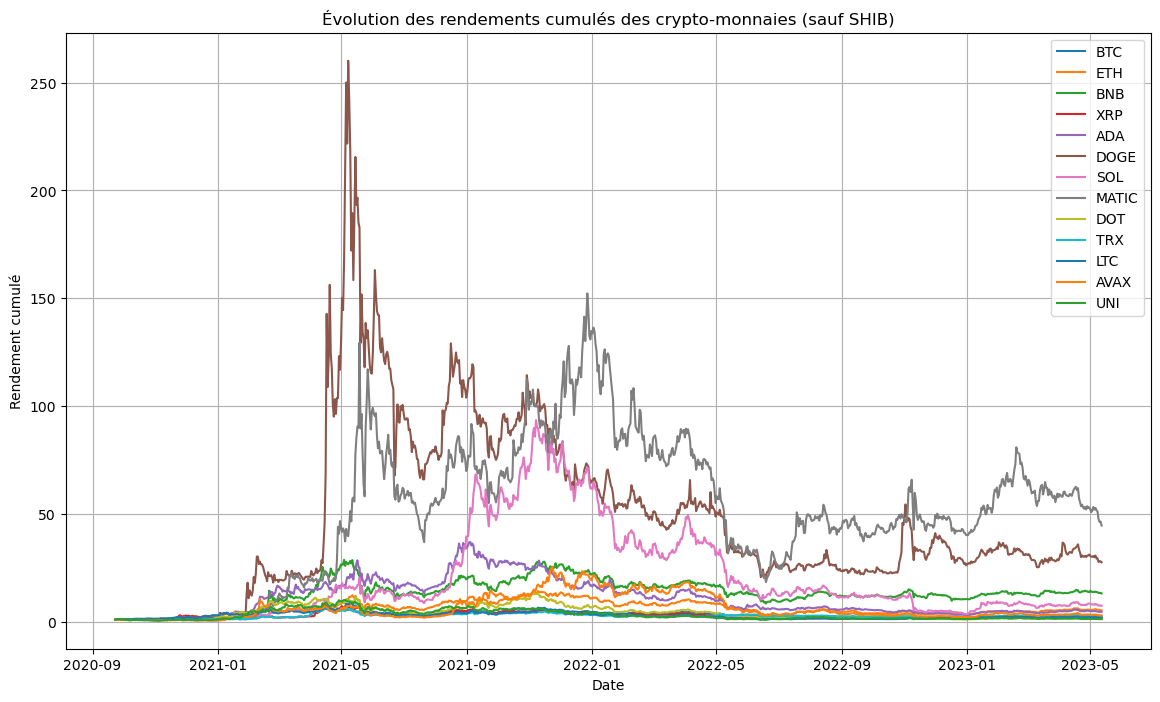

In [14]:
# Calculer les rendements cumulés
cumulative_returns = (1 + crypto_returns).cumprod()

# Filtrer les colonnes sans le SHIB
cumulative_returns_filtered = cumulative_returns.loc[:, cumulative_returns.columns != "SHIB"]

# Créer un graphique
plt.figure(figsize=(14, 8))
for column in cumulative_returns_filtered.columns:
    plt.plot(cumulative_returns_filtered.index, cumulative_returns_filtered[column], label=column)

plt.xlabel("Date")
plt.ylabel("Rendement cumulé")
plt.title("Évolution des rendements cumulés des crypto-monnaies (sauf SHIB)")
plt.legend()
plt.grid()
plt.show()

In [15]:
cumulative_returns

,BTC,ETH,BNB,XRP,ADA,DOGE,SOL,MATIC,DOT,TRX,LTC,AVAX,UNI
time,,,,,,,,,,,,,
2020-09-23 02:00:00,1.008436,1.007737,1.020980,1.006502,1.013390,1.009615,1.060049,1.036687,1.019220,1.002092,1.028764,1.000000,0.910038
2020-09-24 02:00:00,0.979334,0.940811,0.969280,0.952286,0.953473,0.969760,1.022296,0.936943,0.981976,0.994065,0.993709,0.660687,1.011194
2020-09-25 02:00:00,1.027492,1.022105,1.041858,1.004502,1.027869,1.005171,1.128518,1.002354,1.073354,1.045808,1.038547,0.865571,1.196456
2020-09-26 02:00:00,1.023226,1.029461,1.046430,1.041228,1.204365,1.029953,1.150468,1.009156,1.079006,1.087199,1.061683,0.889999,1.142806
2020-09-27 02:00:00,1.029089,1.038047,1.112409,1.042412,1.191225,1.030699,1.130328,0.999052,1.061263,1.091276,1.065979,0.856258,1.133562
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-08 02:00:00,2.740685,5.553346,13.695894,1.955302,4.704560,29.390961,7.932642,51.148140,1.382796,2.788606,1.938403,3.120810,1.233031
2023-05-09 02:00:00,2.653068,5.418730,13.340340,1.854791,4.555924,27.684113,7.447446,47.602414,1.314179,2.742164,1.800987,2.918674,1.158823
2023-05-10 02:00:00,2.644507,5.409282,13.263336,1.856470,4.523979,27.918235,7.447553,46.310530,1.301514,2.770337,1.847829,2.899033,1.153049


In [16]:
# Extraire la colonne du SHIB
#shib_cumulative_returns = cumulative_returns["SHIB"]

# Créer un graphique
#plt.figure(figsize=(14, 8))
#plt.plot(shib_cumulative_returns.index, shib_cumulative_returns, label="SHIB")

#plt.xlabel("Date")
#plt.ylabel("Rendement cumulé")
#plt.title("Évolution des rendements cumulés du SHIB")
#plt.legend()
#plt.grid()
#plt.show()

On voit clairement que nous ne sommes pas sur les mêmes ordres de grandeurs que les autres crytomonnaies, c'est pour cela que nous l'avons écarté du graphique

Aperçu de la normalité des rendements pour les cryptomonnaies

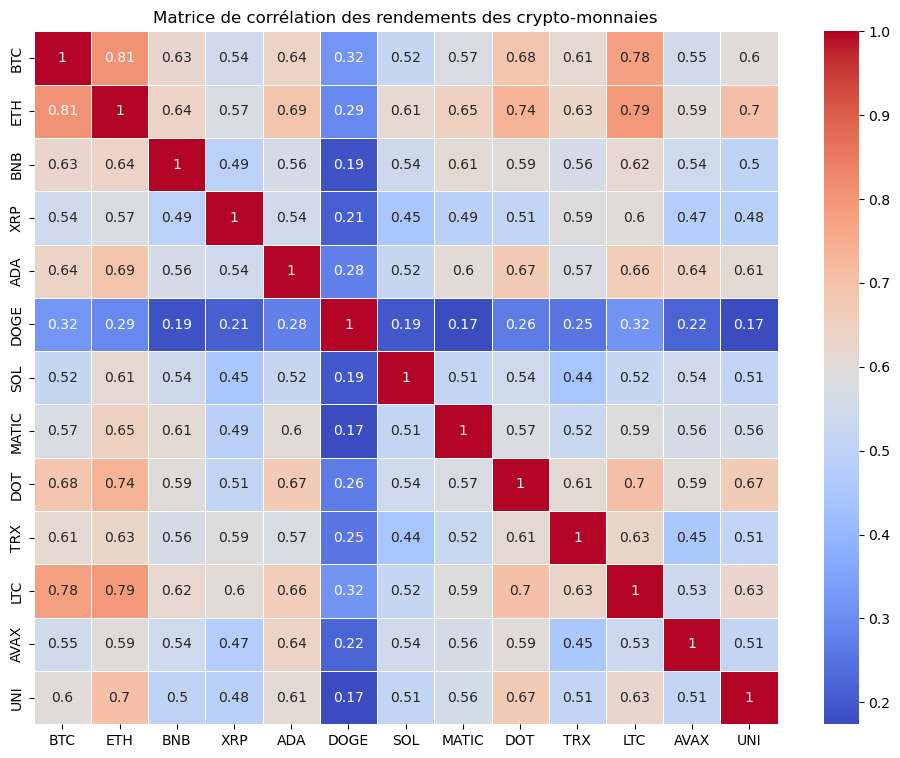

In [17]:
import seaborn as sns

# Calcul des corrélations entre les rendements des crypto-monnaies
correlation_matrix = crypto_returns.corr()

# Affichage de la matrice de corrélation sous forme de heatmap
plt.figure(figsize=(12, 9))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Matrice de corrélation des rendements des crypto-monnaies")
plt.show()


In [18]:
# Supprimer la diagonale (corrélations de 1.0) en la remplacant par NaN
correlation_matrix_no_diag = correlation_matrix.where(~np.eye(correlation_matrix.shape[0], dtype=bool))

# Calculer la moyenne et la médiane des corrélations
crypto_correlation_mean = correlation_matrix_no_diag.mean().mean()
crypto_correlation_median = correlation_matrix_no_diag.median().median()
crypto_correlation_std = correlation_matrix_no_diag.stack().std()

print("Moyenne des corrélations :", crypto_correlation_mean)
print("Médiane des corrélations :", crypto_correlation_median)
print("Ecart-type des corrélations :", crypto_correlation_std)


Moyenne des corrélations : 0.5329586929694684
Médiane des corrélations : 0.5645822211406113
Ecart-type des corrélations : 0.1463441792991866


Il est en effet assez courant que les crypto-monnaies soient fortement corrélées positivement entre elles. Plusieurs facteurs peuvent expliquer cette corrélation :

La dépendance au marché global des crypto-monnaies : Les performances de toutes les crypto-monnaies sont en général liées à la performance globale du marché des crypto-monnaies. Si le marché dans son ensemble est en hausse, il est probable que la plupart des cryptos évolueront dans la même direction, et vice versa. Le marché des crypto-monnaies étant encore jeune et en développement, il est souvent influencé par des facteurs macroéconomiques et des nouvelles qui affectent l'ensemble du marché.

Le rôle du Bitcoin (BTC) en tant que référence : Le Bitcoin est souvent considéré comme l'étalon-or du marché des crypto-monnaies. De nombreuses autres cryptos sont évaluées par rapport au Bitcoin, et leur valeur dépend souvent de la performance du Bitcoin. Par conséquent, si le Bitcoin se porte bien, il est probable que d'autres cryptos suivront également cette tendance.

La nature spéculative du marché des crypto-monnaies : Les investisseurs et les traders sur le marché des crypto-monnaies ont souvent une approche spéculative, cherchant à profiter des fluctuations rapides des prix. Cette spéculation peut entraîner des mouvements de marché similaires pour différentes crypto-monnaies.

Les projets et les technologies sous-jacents : De nombreux projets de crypto-monnaie sont basés sur des technologies similaires ou complémentaires, et les développements ou les annonces concernant une technologie particulière peuvent avoir un impact sur les crypto-monnaies associées.

Cependant, il est important de noter que bien que les corrélations soient généralement élevées, elles ne sont pas constantes et peuvent varier au fil du temps. Il peut donc être intéressant d'étudier les corrélations sur différentes périodes pour détecter des variations et des opportunités potentielles de diversification.

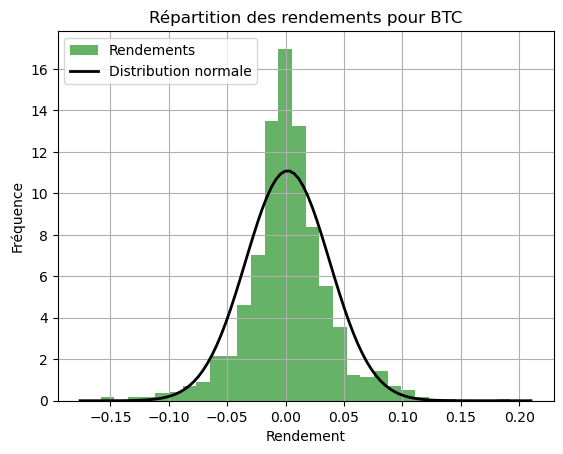

Résultats du test de Jarque-Bera pour BTC:
Statistique: 324.5320
Valeur p: 0.0000
Les rendements de BTC ne semblent pas suivre une distribution normale (On rejette H0).



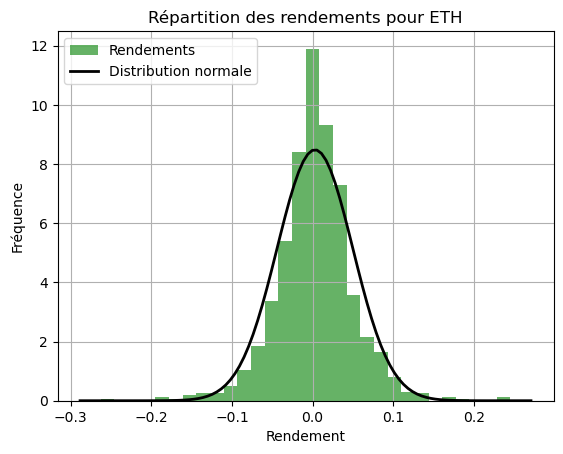

Résultats du test de Jarque-Bera pour ETH:
Statistique: 489.4725
Valeur p: 0.0000
Les rendements de ETH ne semblent pas suivre une distribution normale (On rejette H0).



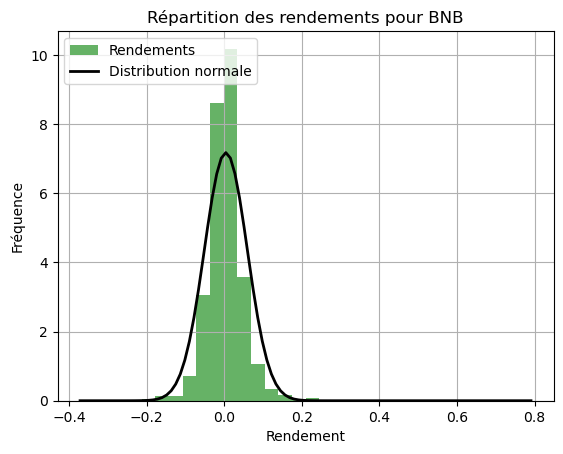

Résultats du test de Jarque-Bera pour BNB:
Statistique: 54052.6224
Valeur p: 0.0000
Les rendements de BNB ne semblent pas suivre une distribution normale (On rejette H0).



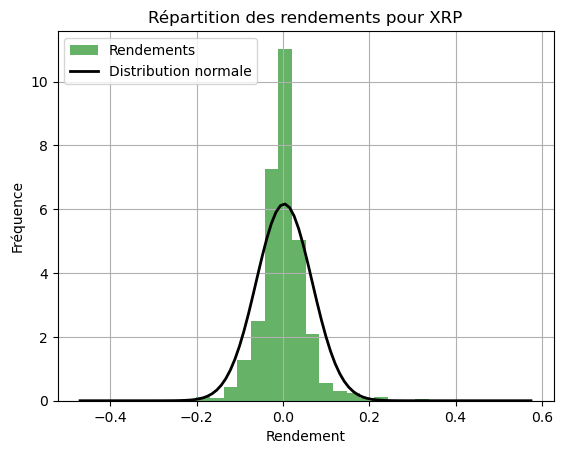

Résultats du test de Jarque-Bera pour XRP:
Statistique: 8264.2164
Valeur p: 0.0000
Les rendements de XRP ne semblent pas suivre une distribution normale (On rejette H0).



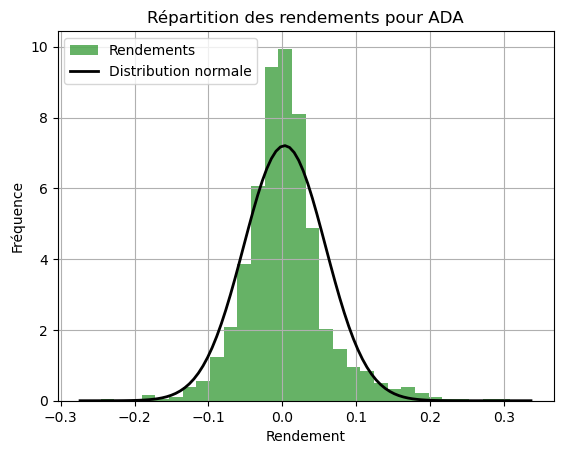

Résultats du test de Jarque-Bera pour ADA:
Statistique: 569.8771
Valeur p: 0.0000
Les rendements de ADA ne semblent pas suivre une distribution normale (On rejette H0).



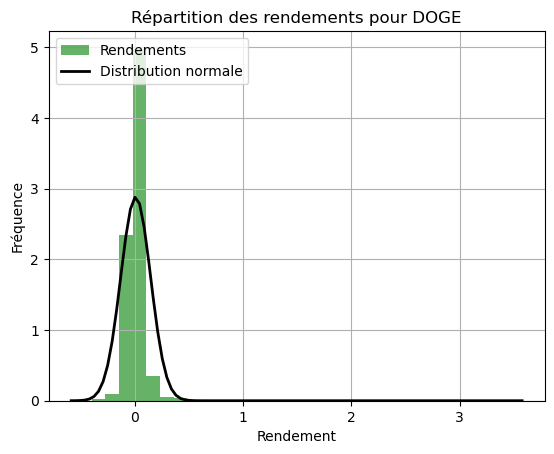

Résultats du test de Jarque-Bera pour DOGE:
Statistique: 5642811.5134
Valeur p: 0.0000
Les rendements de DOGE ne semblent pas suivre une distribution normale (On rejette H0).



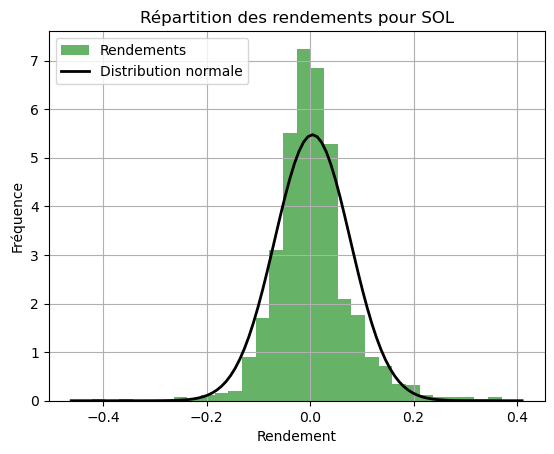

Résultats du test de Jarque-Bera pour SOL:
Statistique: 804.8655
Valeur p: 0.0000
Les rendements de SOL ne semblent pas suivre une distribution normale (On rejette H0).



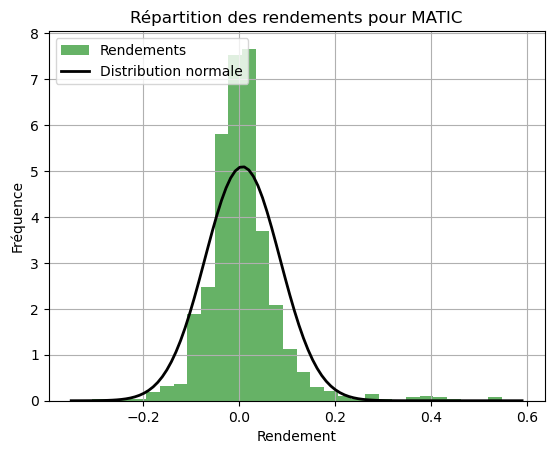

Résultats du test de Jarque-Bera pour MATIC:
Statistique: 4571.0855
Valeur p: 0.0000
Les rendements de MATIC ne semblent pas suivre une distribution normale (On rejette H0).



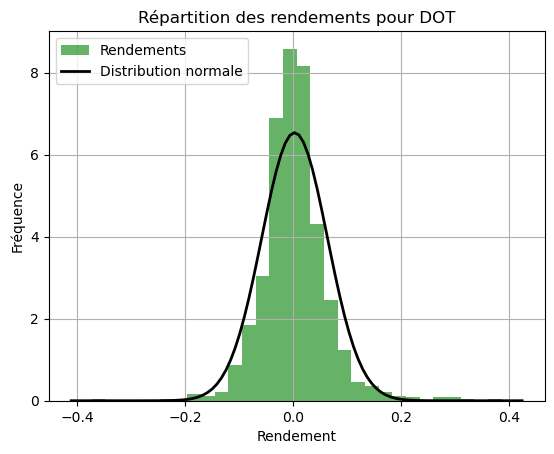

Résultats du test de Jarque-Bera pour DOT:
Statistique: 1591.4948
Valeur p: 0.0000
Les rendements de DOT ne semblent pas suivre une distribution normale (On rejette H0).



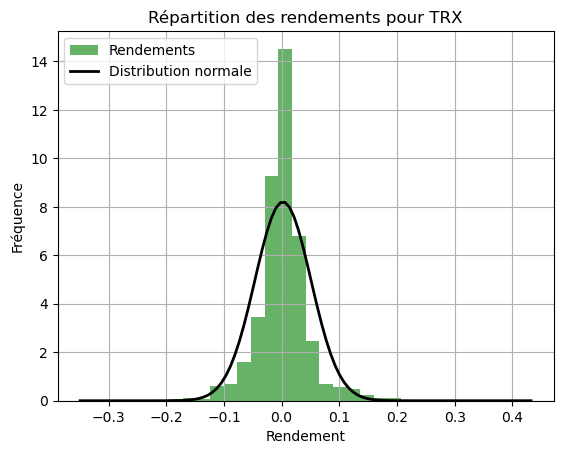

Résultats du test de Jarque-Bera pour TRX:
Statistique: 3982.2333
Valeur p: 0.0000
Les rendements de TRX ne semblent pas suivre une distribution normale (On rejette H0).



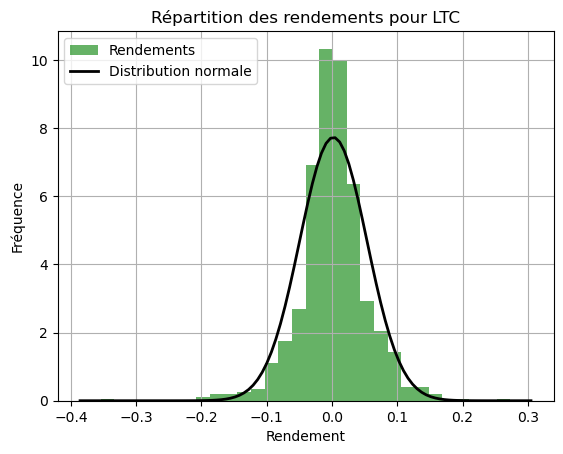

Résultats du test de Jarque-Bera pour LTC:
Statistique: 763.9438
Valeur p: 0.0000
Les rendements de LTC ne semblent pas suivre une distribution normale (On rejette H0).



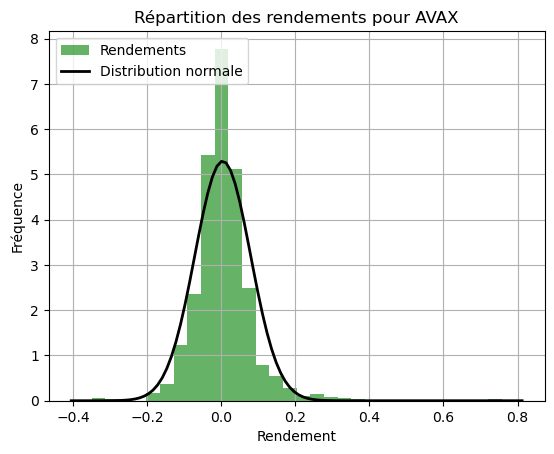

Résultats du test de Jarque-Bera pour AVAX:
Statistique: 7459.8942
Valeur p: 0.0000
Les rendements de AVAX ne semblent pas suivre une distribution normale (On rejette H0).



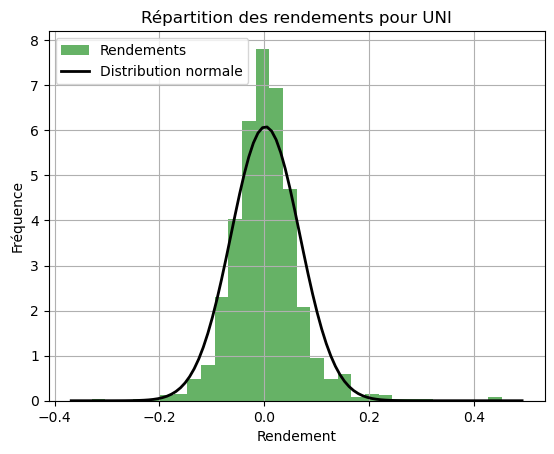

Résultats du test de Jarque-Bera pour UNI:
Statistique: 1641.8334
Valeur p: 0.0000
Les rendements de UNI ne semblent pas suivre une distribution normale (On rejette H0).



In [19]:
from scipy.stats import norm, jarque_bera

# Calculer les rendements
crypto_returns = crypto_prices.pct_change().dropna()

# Pour chaque colonne (crypto-monnaie) dans les données de rendement
for column in crypto_returns.columns:
    # Obtenir les rendements de la colonne actuelle
    returns = crypto_returns[column]

    # Calculer la moyenne et l'écart-type des rendements
    mean, std = np.mean(returns), np.std(returns)

    # Créer un histogramme des rendements
    plt.hist(returns, bins=30, density=True, alpha=0.6, color='g', label="Rendements")

    # Estimer la densité de probabilité d'une distribution normale
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mean, std)
    plt.plot(x, p, 'k', linewidth=2, label="Distribution normale")

    # Configurer le graphique
    plt.title(f"Répartition des rendements pour {column}")
    plt.xlabel("Rendement")
    plt.ylabel("Fréquence")
    plt.legend(loc="upper left")
    plt.grid(True)

    # Afficher le graphique
    plt.show()

    # Effectuer le test de Jarque-Bera
    jb_stat, jb_p_value = jarque_bera(returns)
    print(f"Résultats du test de Jarque-Bera pour {column}:")
    print(f"Statistique: {jb_stat:.4f}")
    print(f"Valeur p: {jb_p_value:.4f}")

    # Interpréter les résultats du test
    alpha = 0.05
    if jb_p_value > alpha:
        print(f"Les rendements de {column} semblent suivre une distribution normale (On ne rejette pas H0).\n")
    else:
        print(f"Les rendements de {column} ne semblent pas suivre une distribution normale (On rejette H0).\n")


Nous souhaitons maintenant comparer les corrélations entre les crypto-monnaies et les actions US.

Donc nous allons récupérer les prix des actions 

In [20]:
#!pip install yfinance

Defaulting to user installation because normal site-packages is not writeable


In [62]:
import yfinance as yf

def get_stock_data(tickers, start_date, end_date):
    stock_data = yf.download(tickers, start=start_date, end=end_date)
    return stock_data["Adj Close"]

start_date = "2020-01-01"
end_date = "2023-04-29"

# Liste des symboles des 15 premières actions américaines par capitalisation boursière
top_us_stocks = [
    "AAPL", "MSFT", "GOOGL", "AMZN", "BRK-B",
    "TSLA", "JPM", "JNJ", "V", "PG", "NVDA", "MA", "UNH"
]

# Ajout des indices S&P 500 (^GSPC) et Nasdaq 100 (^NDX)
#top_us_stocks.extend(["^GSPC", "^NDX"])

stock_prices = get_stock_data(top_us_stocks, start_date, end_date)
Nasdaq_prices = get_stock_data(["^GSPC"], start_date, end_date)


[*********************100%***********************]  13 of 13 completed
[*********************100%***********************]  1 of 1 completed


In [22]:
stock_prices

,AAPL,AMZN,BRK-B,GOOGL,JNJ,JPM,MA,MSFT,NVDA,PG,TSLA,UNH,V
Date,,,,,,,,,,,,,
2020-01-02,73.347931,94.900497,228.389999,68.433998,134.100235,126.807800,297.590363,155.761826,59.760403,113.211075,28.684000,279.191498,186.643585
2020-01-03,72.634850,93.748497,226.179993,68.075996,132.547684,125.134422,294.686859,153.822296,58.803875,112.449661,29.534000,276.366241,185.159180
2020-01-06,73.213615,95.143997,226.990005,69.890503,132.382309,125.034912,295.471649,154.219879,59.050480,112.605614,30.102667,278.284698,184.758759
2020-01-07,72.869293,95.343002,225.919998,69.755501,133.190720,122.909248,294.471100,152.813766,59.765377,111.908417,31.270666,276.604828,184.270462
2020-01-08,74.041489,94.598503,225.990005,70.251999,133.172394,123.868065,299.666901,155.247818,59.877476,112.385445,32.809334,282.436829,187.424835
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-24,165.101639,106.209999,326.049988,105.970001,163.679993,140.729996,374.730011,281.769989,270.420013,156.350006,162.550003,488.940002,232.307098
2023-04-25,163.543793,102.570000,324.339996,103.849998,165.179993,137.669998,368.529999,275.420013,262.410004,156.389999,160.669998,491.920013,229.143265
2023-04-26,163.533798,104.980003,320.529999,103.709999,162.619995,135.229996,366.760010,295.369995,269.559998,154.580002,153.750000,482.950012,227.706055


In [63]:
#stock_returns = stock_prices_filled.pct_change().dropna()
stock_returns = stock_prices.pct_change()
Nasdaq_returns = Nasdaq_prices.pct_change()

# Calculer la matrice de corrélation
stock_correlation_matrix = stock_returns.corr()

# Afficher la matrice de corrélation
#print(stock_correlation_matrix)


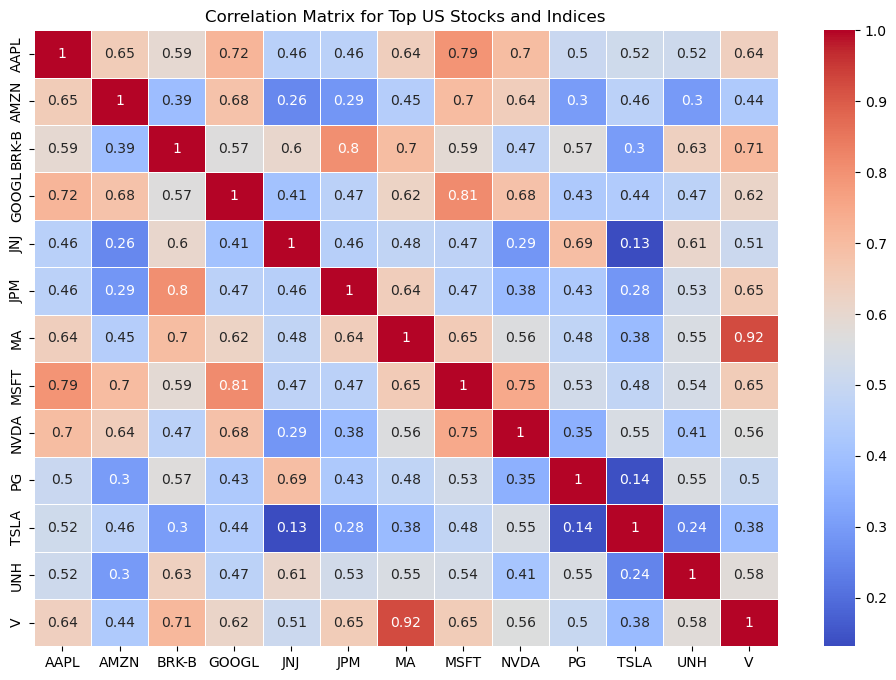

In [24]:
# Afficher la heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(stock_correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix for Top US Stocks and Indices")
plt.show()


In [25]:
# Supprimer la diagonale (corrélations de 1.0) en la remplacant par NaN
stock_correlation_matrix_no_diag = stock_correlation_matrix.where(~np.eye(stock_correlation_matrix.shape[0], dtype=bool))

# Calculer la moyenne et la médiane des corrélations
stock_correlation_mean = stock_correlation_matrix_no_diag.mean().mean()
stock_correlation_median = stock_correlation_matrix_no_diag.median().median()
stock_correlation_std = stock_correlation_matrix_no_diag.stack().std()

print("Moyenne des corrélations :", stock_correlation_mean)
print("Médiane des corrélations :", stock_correlation_median)
print("Ecart-type des corrélations :", stock_correlation_std)


Moyenne des corrélations : 0.5225231135446324
Médiane des corrélations : 0.5536083907035669
Ecart-type des corrélations : 0.1545857657771297


On voit donc qu'il y a une moins grande corrélation pour nos actions que pour les cryptomonnaies.

Nous allons comparer maintenant aux actions d'entreprises technologiques

In [26]:
def get_stock_data(tickers, start_date, end_date):
    stock_data = yf.download(tickers, start=start_date, end=end_date)
    return stock_data["Adj Close"]

start_date = "2020-01-01"
end_date = "2023-04-29"

# Liste des symboles des 15 premières actions technologiques américaines
top_us_tech_stocks = [
    "AAPL", "MSFT", "GOOGL", "AMZN", "NVDA", "PYPL",
    "ADBE", "CSCO", "INTC", "NFLX", "AVGO", "CRM", "TXN"
]

# Ajout des indices S&P 500 (^GSPC) et Nasdaq 100 (^NDX)
#top_us_tech_stocks.extend(["^GSPC", "^NDX"])

stock_prices = get_stock_data(top_us_tech_stocks, start_date, end_date)
stock_returns = stock_prices.pct_change()


# Calculer la matrice de corrélation
stock_correlation_matrix = stock_returns.corr()

# Afficher la matrice de corrélation
print(stock_correlation_matrix)

[*********************100%***********************]  13 of 13 completed
           AAPL      ADBE      AMZN      AVGO       CRM      CSCO     GOOGL  \
AAPL   1.000000  0.712193  0.650082  0.695435  0.601998  0.606143  0.717543   
ADBE   0.712193  1.000000  0.661390  0.678589  0.733640  0.536834  0.720540   
AMZN   0.650082  0.661390  1.000000  0.552749  0.602447  0.417371  0.678391   
AVGO   0.695435  0.678589  0.552749  1.000000  0.584722  0.615600  0.656071   
CRM    0.601998  0.733640  0.602447  0.584722  1.000000  0.464762  0.623066   
CSCO   0.606143  0.536834  0.417371  0.615600  0.464762  1.000000  0.563953   
GOOGL  0.717543  0.720540  0.678391  0.656071  0.623066  0.563953  1.000000   
INTC   0.601553  0.582285  0.460607  0.658912  0.479284  0.585575  0.593004   
MSFT   0.793714  0.796159  0.698995  0.715334  0.690245  0.619079  0.811205   
NFLX   0.485292  0.553718  0.577803  0.450659  0.516020  0.294367  0.486561   
NVDA   0.697931  0.716170  0.643588  0.727822  0.633391  0.5

[*********************100%***********************]  13 of 13 completed


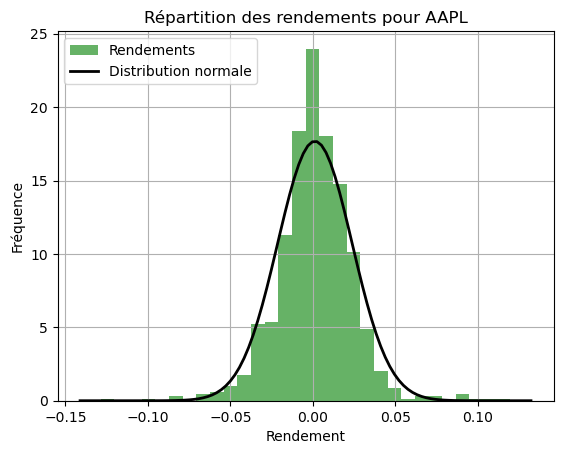

Skewness pour AAPL: 0.0773
Kurtosis pour AAPL: 4.1774
Résultats du test de Jarque-Bera pour AAPL:
Statistique: 608.6946
Valeur p: 0.0000
Les rendements de AAPL ne semblent pas suivre une distribution normale (On rejette H0).



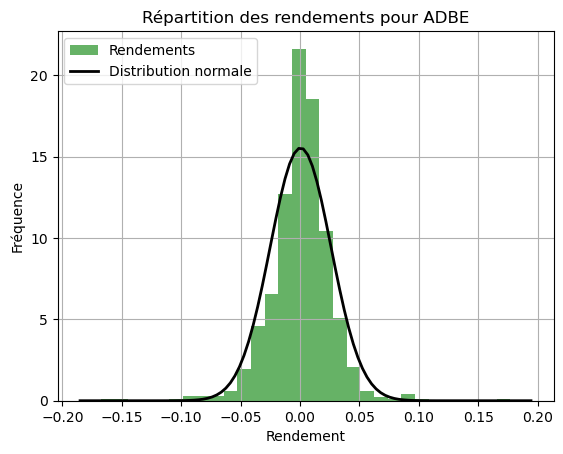

Skewness pour ADBE: -0.3217
Kurtosis pour ADBE: 7.1424
Résultats du test de Jarque-Bera pour ADBE:
Statistique: 1791.4201
Valeur p: 0.0000
Les rendements de ADBE ne semblent pas suivre une distribution normale (On rejette H0).



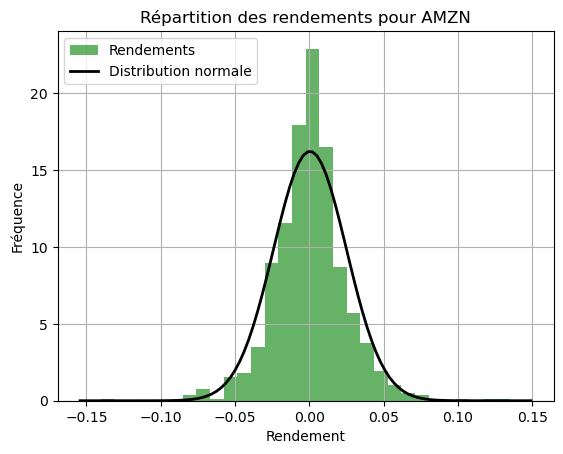

Skewness pour AMZN: 0.0919
Kurtosis pour AMZN: 3.6499
Résultats du test de Jarque-Bera pour AMZN:
Statistique: 465.2090
Valeur p: 0.0000
Les rendements de AMZN ne semblent pas suivre une distribution normale (On rejette H0).



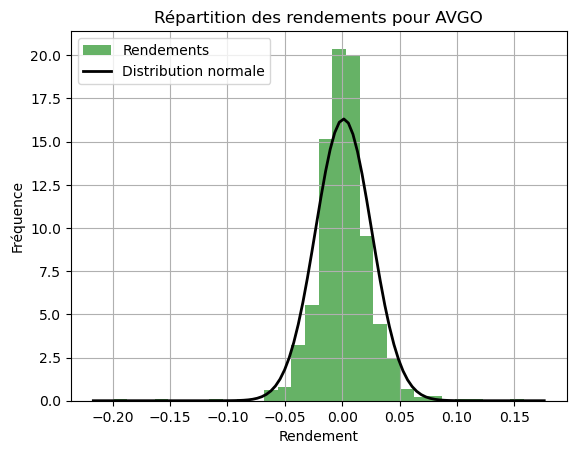

Skewness pour AVGO: -0.5408
Kurtosis pour AVGO: 10.4153
Résultats du test de Jarque-Bera pour AVGO:
Statistique: 3819.4182
Valeur p: 0.0000
Les rendements de AVGO ne semblent pas suivre une distribution normale (On rejette H0).



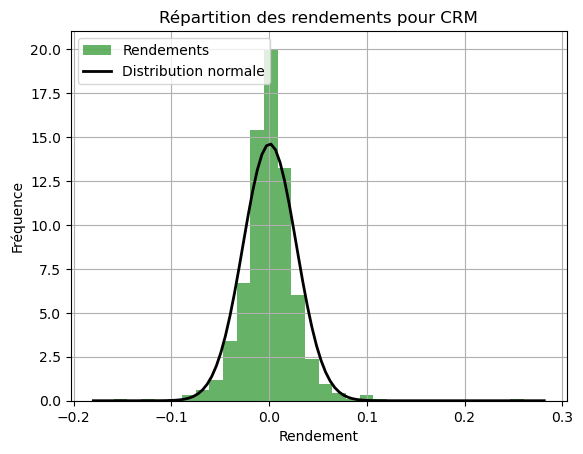

Skewness pour CRM: 0.8114
Kurtosis pour CRM: 12.2024
Résultats du test de Jarque-Bera pour CRM:
Statistique: 5278.3834
Valeur p: 0.0000
Les rendements de CRM ne semblent pas suivre une distribution normale (On rejette H0).



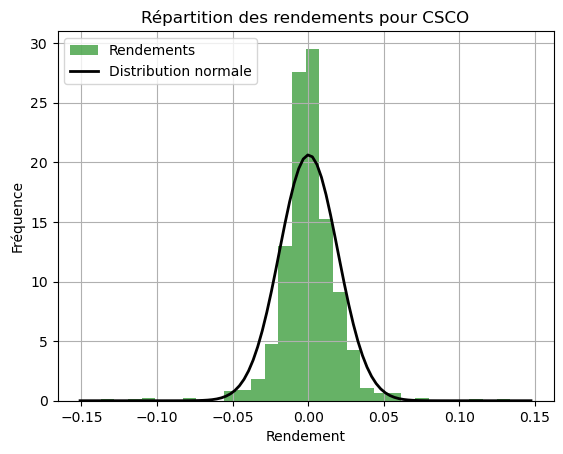

Skewness pour CSCO: -0.3291
Kurtosis pour CSCO: 10.7909
Résultats du test de Jarque-Bera pour CSCO:
Statistique: 4071.1820
Valeur p: 0.0000
Les rendements de CSCO ne semblent pas suivre une distribution normale (On rejette H0).



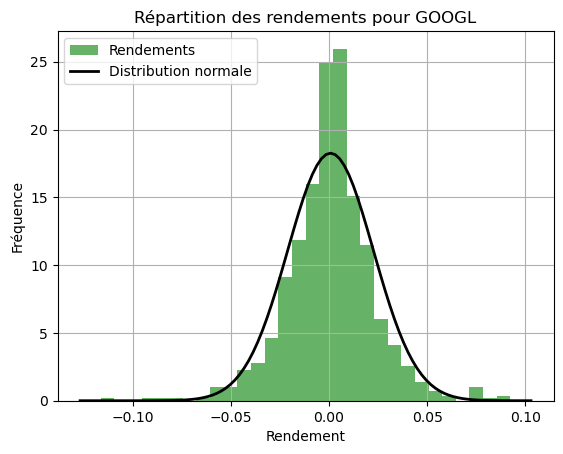

Skewness pour GOOGL: -0.0311
Kurtosis pour GOOGL: 2.8338
Résultats du test de Jarque-Bera pour GOOGL:
Statistique: 279.8568
Valeur p: 0.0000
Les rendements de GOOGL ne semblent pas suivre une distribution normale (On rejette H0).



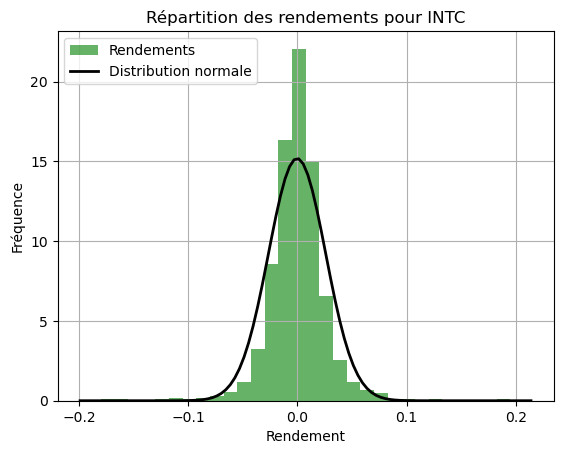

Skewness pour INTC: -0.1990
Kurtosis pour INTC: 9.8775
Résultats du test de Jarque-Bera pour INTC:
Statistique: 3404.0557
Valeur p: 0.0000
Les rendements de INTC ne semblent pas suivre une distribution normale (On rejette H0).



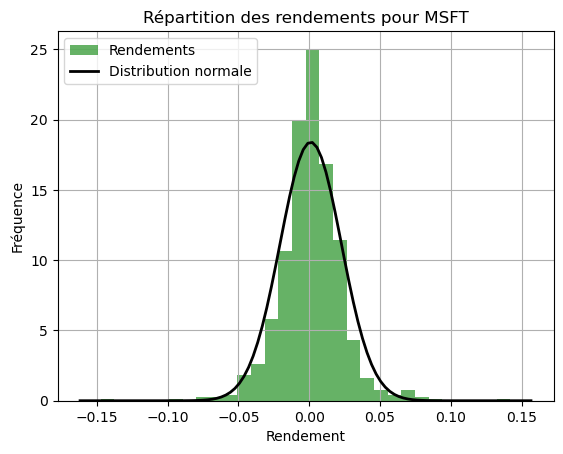

Skewness pour MSFT: 0.0344
Kurtosis pour MSFT: 6.0423
Résultats du test de Jarque-Bera pour MSFT:
Statistique: 1271.8886
Valeur p: 0.0000
Les rendements de MSFT ne semblent pas suivre une distribution normale (On rejette H0).



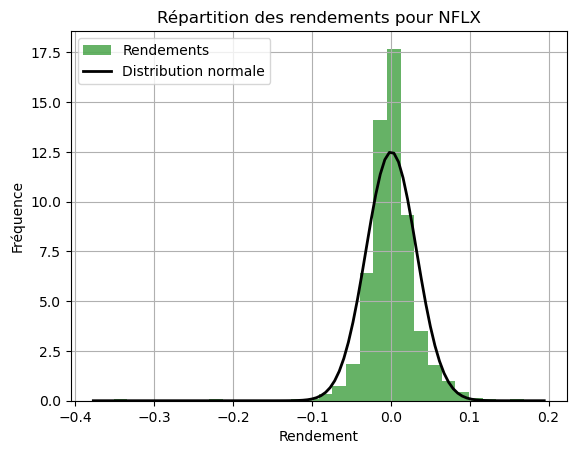

Skewness pour NFLX: -1.5460
Kurtosis pour NFLX: 21.2232
Résultats du test de Jarque-Bera pour NFLX:
Statistique: 16022.8486
Valeur p: 0.0000
Les rendements de NFLX ne semblent pas suivre une distribution normale (On rejette H0).



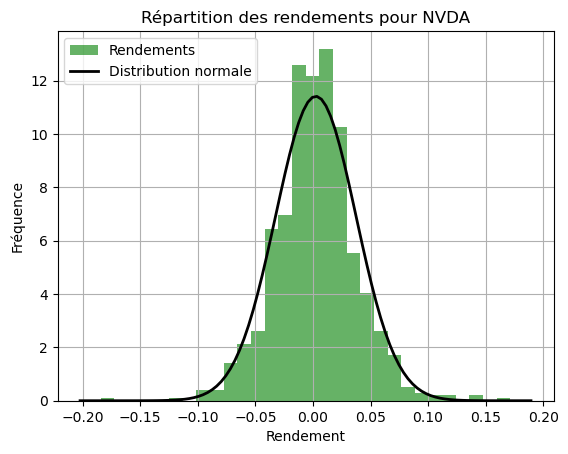

Skewness pour NVDA: 0.0916
Kurtosis pour NVDA: 2.1627
Résultats du test de Jarque-Bera pour NVDA:
Statistique: 164.0893
Valeur p: 0.0000
Les rendements de NVDA ne semblent pas suivre une distribution normale (On rejette H0).



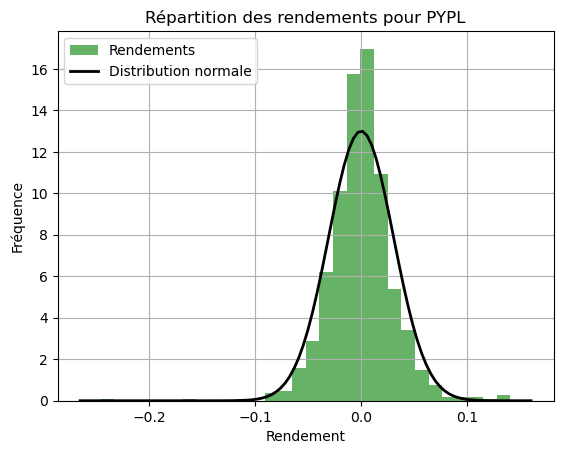

Skewness pour PYPL: -0.2853
Kurtosis pour PYPL: 7.2713
Résultats du test de Jarque-Bera pour PYPL:
Statistique: 1853.0495
Valeur p: 0.0000
Les rendements de PYPL ne semblent pas suivre une distribution normale (On rejette H0).



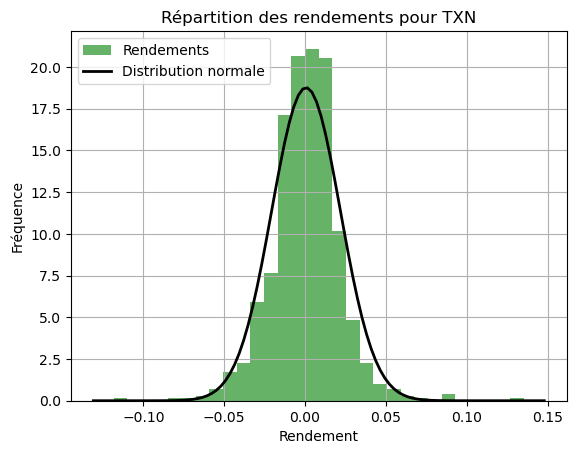

Skewness pour TXN: 0.1487
Kurtosis pour TXN: 4.1700
Résultats du test de Jarque-Bera pour TXN:
Statistique: 608.7811
Valeur p: 0.0000
Les rendements de TXN ne semblent pas suivre une distribution normale (On rejette H0).



In [27]:
from scipy.stats import norm, jarque_bera, skew, kurtosis

def get_stock_data(tickers, start_date, end_date):
    stock_data = yf.download(tickers, start=start_date, end=end_date)
    return stock_data["Adj Close"]

start_date = "2020-01-01"
end_date = "2023-04-29"

top_us_tech_stocks = [
    "AAPL", "MSFT", "GOOGL", "AMZN", "NVDA", "PYPL",
    "ADBE", "CSCO", "INTC", "NFLX", "AVGO", "CRM", "TXN"
]

stock_prices = get_stock_data(top_us_tech_stocks, start_date, end_date)
stock_returns = stock_prices.pct_change().dropna()

# Pour chaque colonne (action) dans les données de rendement
for column in stock_returns.columns:
    # Obtenir les rendements de la colonne actuelle
    returns = stock_returns[column]

    # Calculer la moyenne et l'écart-type des rendements
    mean, std = np.mean(returns), np.std(returns)

    # Calculer la skewness et le kurtosis
    skewness = skew(returns)
    kurt = kurtosis(returns)

    # Créer un histogramme des rendements
    plt.hist(returns, bins=30, density=True, alpha=0.6, color='g', label="Rendements")

    # Estimer la densité de probabilité d'une distribution normale
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mean, std)
    plt.plot(x, p, 'k', linewidth=2, label="Distribution normale")

    # Configurer le graphique
    plt.title(f"Répartition des rendements pour {column}")
    plt.xlabel("Rendement")
    plt.ylabel("Fréquence")
    plt.legend(loc="upper left")
    plt.grid(True)

    # Afficher le graphique
    plt.show()

    # Afficher la skewness et le kurtosis
    print(f"Skewness pour {column}: {skewness:.4f}")
    print(f"Kurtosis pour {column}: {kurt:.4f}")

    # Effectuer le test de Jarque-Bera
    jb_stat, jb_p_value = jarque_bera(returns)
    print(f"Résultats du test de Jarque-Bera pour {column}:")
    print(f"Statistique: {jb_stat:.4f}")
    print(f"Valeur p: {jb_p_value:.4f}")

    # Interpréter les résultats du test
    alpha = 0.05
    if jb_p_value > alpha:
        print(f"Les rendements de {column} semblent suivre une distribution normale (On ne rejette pas H0).\n")
    else:
        print(f"Les rendements de {column} ne semblent pas suivre une distribution normale (On rejette H0).\n")


In [32]:
for column in stock_returns:
    test = jarque_bera(stock_returns[column])
    print(column,test)

AAPL Jarque_beraResult(statistic=608.6946123009898, pvalue=0.0)
ADBE Jarque_beraResult(statistic=1791.4200768525177, pvalue=0.0)
AMZN Jarque_beraResult(statistic=465.20897546872993, pvalue=0.0)
AVGO Jarque_beraResult(statistic=3819.4182356659176, pvalue=0.0)
CRM Jarque_beraResult(statistic=5278.383421405286, pvalue=0.0)
CSCO Jarque_beraResult(statistic=4071.18202084587, pvalue=0.0)
GOOGL Jarque_beraResult(statistic=279.8568110269153, pvalue=0.0)
INTC Jarque_beraResult(statistic=3404.0557231503044, pvalue=0.0)
MSFT Jarque_beraResult(statistic=1271.8886241839284, pvalue=0.0)
NFLX Jarque_beraResult(statistic=16022.848588272906, pvalue=0.0)
NVDA Jarque_beraResult(statistic=164.08934993346466, pvalue=0.0)
PYPL Jarque_beraResult(statistic=1853.0495494406896, pvalue=0.0)
TXN Jarque_beraResult(statistic=608.7810856740864, pvalue=0.0)


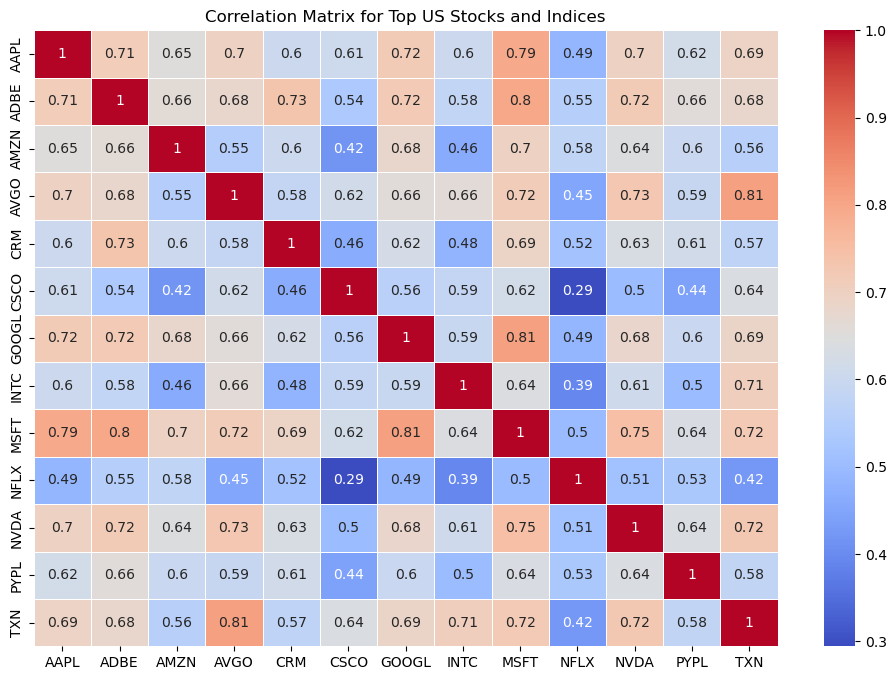

In [33]:
# Afficher la heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(stock_correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix for Top US Stocks and Indices")
plt.show()

In [34]:
# Supprimer la diagonale (corrélations de 1.0) en la remplacant par NaN
stock_correlation_matrix_no_diag = stock_correlation_matrix.where(~np.eye(stock_correlation_matrix.shape[0], dtype=bool))

# Calculer la moyenne et la médiane des corrélations
stock_correlation_mean = stock_correlation_matrix_no_diag.mean().mean()
stock_correlation_median = stock_correlation_matrix_no_diag.median().median()
stock_correlation_std = stock_correlation_matrix_no_diag.stack().std()

print("Moyenne des corrélations :", stock_correlation_mean)
print("Médiane des corrélations :", stock_correlation_median)
print("Ecart-type des corrélations :", stock_correlation_std)

Moyenne des corrélations : 0.6120241019209581
Médiane des corrélations : 0.6574919077922259
Ecart-type des corrélations : 0.10257825510075484


Nous allons maintenant mettre en place notre théorème des 2 fonds

In [35]:
# Calculer les rendements moyens
mean_returns = crypto_returns.mean()

# Calculer la matrice de covariance
cov_matrix = crypto_returns.cov()

# Nombre de cryptos
num_cryptos = len(crypto_returns.columns)

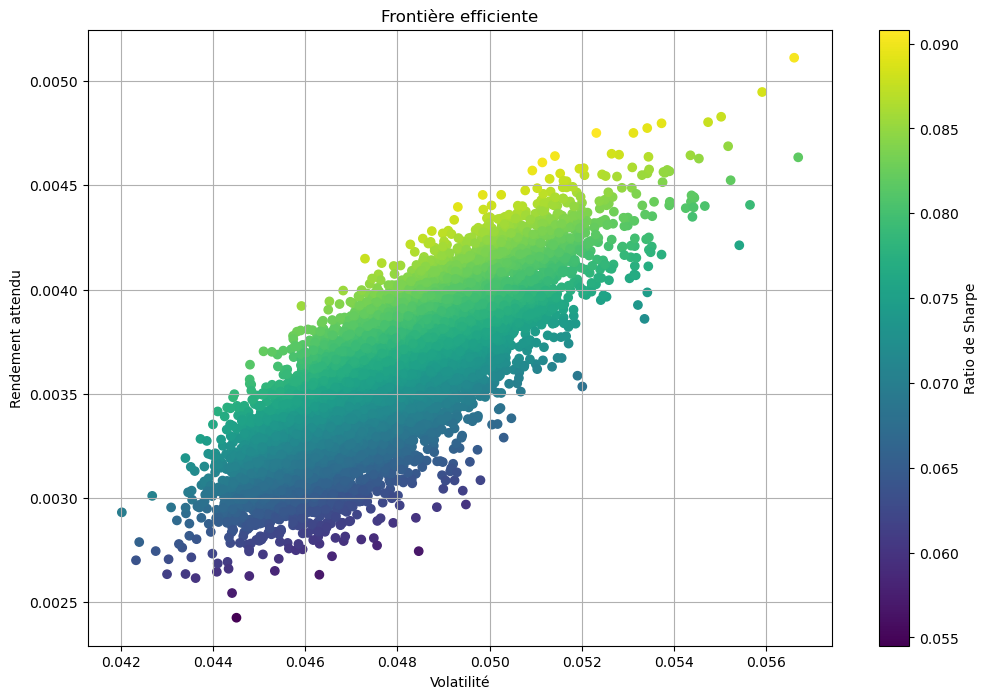

In [37]:
np.random.seed(42)

weights_list = []

# Nombre de portefeuilles à simuler
num_portfolios = 10000

# Initialiser les tableaux pour les résultats
results = np.zeros((num_portfolios, 2 + num_cryptos))

# Générer les portefeuilles aléatoires
for i in range(num_portfolios):
    # Générer des poids aléatoires
    weights = np.random.random(num_cryptos)
    weights /= np.sum(weights)
    weights_list.append(weights)

    # Calculer le rendement attendu
    portfolio_return = np.sum(mean_returns * weights)

    # Calculer la volatilité
    portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

    # Enregistrer les résultats
    results[i, 0] = portfolio_return
    results[i, 1] = portfolio_std_dev

    # Enregistrer les poids
    for j in range(len(weights)):
        results[i, j + 2] = weights[j]

# Convertir les résultats en DataFrame
results_df = pd.DataFrame(results, columns=["Rendement", "Volatilité"] + list(crypto_returns.columns))

# Tracer la frontière efficiente
plt.figure(figsize=(12, 8))
plt.scatter(results_df["Volatilité"], results_df["Rendement"], c=(results_df["Rendement"] / results_df["Volatilité"]), cmap='viridis')
plt.colorbar(label="Ratio de Sharpe")
plt.xlabel("Volatilité")
plt.ylabel("Rendement attendu")
plt.title("Frontière efficiente")
plt.grid(True)
plt.show()


In [38]:
crypto_returns.mean()

BTC      0.001637
ETH      0.002840
BNB      0.004121
XRP      0.002643
ADA      0.003061
DOGE     0.008562
SOL      0.004708
MATIC    0.006795
DOT      0.002104
TRX      0.002212
LTC      0.002010
AVAX     0.003793
UNI      0.002270
dtype: float64

In [39]:
results_df

,Rendement,Volatilité,BTC,ETH,BNB,XRP,ADA,DOGE,SOL,MATIC,DOT,TRX,LTC,AVAX,UNI
0,0.003463,0.047895,0.053321,0.135346,0.104209,0.085227,0.022211,0.022208,0.008269,0.123311,0.085576,0.100803,0.002930,0.138079,0.118509
1,0.003858,0.049606,0.044415,0.038032,0.038362,0.063638,0.109762,0.090349,0.060916,0.127980,0.029178,0.061107,0.076631,0.095395,0.164234
2,0.003460,0.047840,0.033249,0.085630,0.098648,0.007735,0.101168,0.028395,0.010832,0.158007,0.160796,0.134613,0.050724,0.016264,0.113938
3,0.003458,0.048234,0.070645,0.019587,0.079477,0.005519,0.145948,0.041535,0.106336,0.050030,0.083472,0.087748,0.029670,0.155621,0.124411
4,0.003003,0.044377,0.153123,0.145842,0.097448,0.150250,0.014423,0.031942,0.007371,0.053024,0.063348,0.044225,0.135071,0.058145,0.045788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.003161,0.044123,0.136896,0.102596,0.126465,0.075243,0.014222,0.020156,0.135853,0.048476,0.054953,0.138169,0.067565,0.001959,0.077449
9996,0.003377,0.045866,0.138575,0.102756,0.122879,0.097804,0.042752,0.016763,0.002986,0.130308,0.073562,0.097111,0.022253,0.105254,0.046997
9997,0.003692,0.048756,0.112596,0.082476,0.008664,0.029679,0.032357,0.110933,0.067498,0.088889,0.067278,0.056100,0.113716,0.113607,0.116207
9998,0.003295,0.045363,0.153038,0.052908,0.112988,0.054046,0.142758,0.084565,0.059482,0.001217,0.107882,0.072768,0.015290,0.060993,0.082065


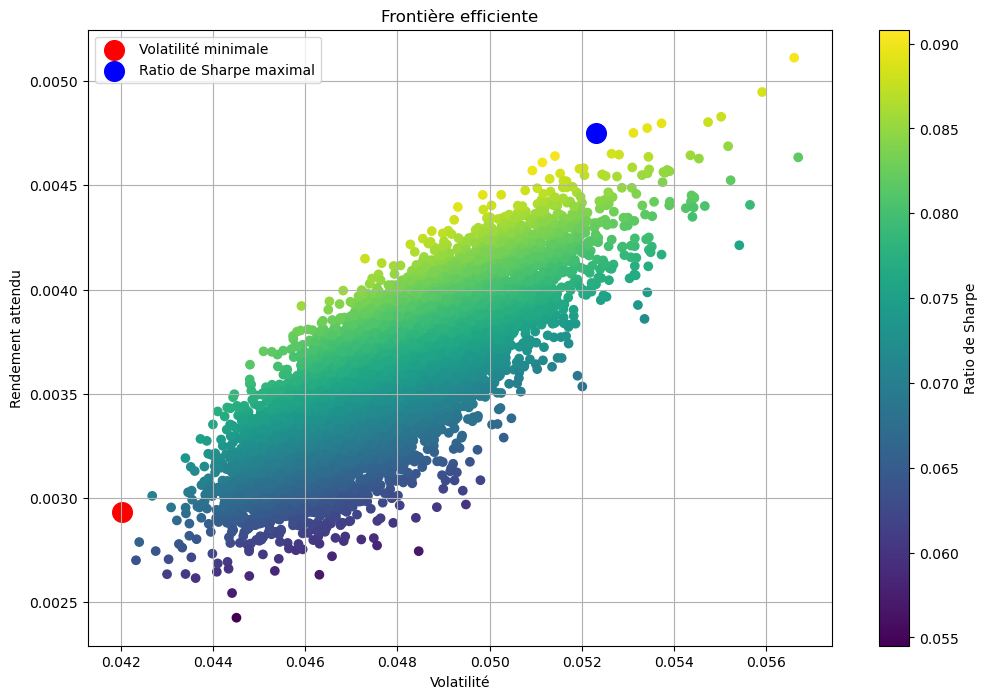

In [40]:
# Trouver le portefeuille à la volatilité minimale
min_volatility_index = results_df["Volatilité"].idxmin()
min_volatility_portfolio = results_df.iloc[min_volatility_index]

# Trouver le portefeuille ayant le ratio de Sharpe maximal
sharpe_ratios = results_df["Rendement"] / results_df["Volatilité"]
max_sharpe_index = sharpe_ratios.idxmax()
max_sharpe_portfolio = results_df.iloc[max_sharpe_index]

# Tracer la frontière efficiente
plt.figure(figsize=(12, 8))
plt.scatter(results_df["Volatilité"], results_df["Rendement"], c=(results_df["Rendement"] / results_df["Volatilité"]), cmap='viridis')
plt.colorbar(label="Ratio de Sharpe")
plt.xlabel("Volatilité")
plt.ylabel("Rendement attendu")
plt.title("Frontière efficiente")

# Marquer le portefeuille à la volatilité minimale et le portefeuille ayant le ratio de Sharpe maximal
plt.scatter(min_volatility_portfolio["Volatilité"], min_volatility_portfolio["Rendement"], c='red', marker='o', s=200, label="Volatilité minimale")
plt.scatter(max_sharpe_portfolio["Volatilité"], max_sharpe_portfolio["Rendement"], c='blue', marker='o', s=200, label="Ratio de Sharpe maximal")

# Tracer la ligne reliant les deux points
#plt.plot([min_volatility_portfolio["Volatilité"], max_sharpe_portfolio["Volatilité"]], [min_volatility_portfolio["Rendement"], max_sharpe_portfolio["Rendement"]], linestyle='--', color='black')

plt.legend(loc="upper left")
plt.grid(True)
plt.show()


In [41]:
# Trouver le portefeuille avec le meilleur ratio de Sharpe
best_sharpe_ratio_index = (results_df["Rendement"] / results_df["Volatilité"]).idxmax()
best_sharpe_ratio_portfolio = results_df.iloc[best_sharpe_ratio_index]

# Récupérer les poids du portefeuille avec le meilleur ratio de Sharpe
best_sharpe_weights = weights_list[best_sharpe_ratio_index]

# Créer un DataFrame avec la composition du portefeuille optimal
optimal_portfolio = pd.DataFrame(data=best_sharpe_weights, index=crypto_returns.columns, columns=["Poids"])
optimal_portfolio["Poids"] = optimal_portfolio["Poids"].apply(lambda x: round(x * 100, 2))  # Convertir les poids en pourcentages

print("Composition du portefeuille optimal :")
print(optimal_portfolio)

Composition du portefeuille optimal :
       Poids
BTC     0.95
ETH     3.23
BNB    19.31
XRP     0.00
ADA    10.51
DOGE   13.18
SOL     1.38
MATIC  24.55
DOT     5.70
TRX     7.67
LTC     7.67
AVAX    5.81
UNI     0.04


In [42]:
best_sharpe_ratio_portfolio

Rendement     0.004751
Volatilité    0.052314
BTC           0.009478
ETH           0.032257
BNB           0.193128
XRP           0.000003
ADA           0.105089
DOGE          0.131816
SOL           0.013783
MATIC         0.245482
DOT           0.057046
TRX           0.076741
LTC           0.076677
AVAX          0.058128
UNI           0.000372
Name: 223, dtype: float64

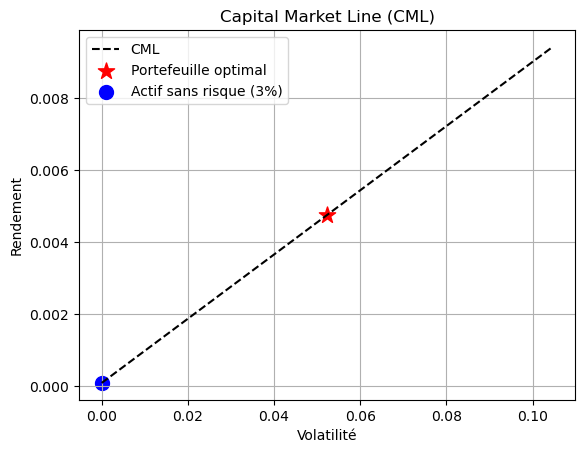

In [43]:
# Rendement sans risque (en décimal)
risk_free_rate = 0.03/365

# Rendement et volatilité du portefeuille optimal
optimal_portfolio_return = best_sharpe_ratio_portfolio["Rendement"]
optimal_portfolio_volatility = best_sharpe_ratio_portfolio["Volatilité"]

# Créer une gamme de volatilités pour la CML
volatilities = np.linspace(0, optimal_portfolio_volatility * 2, 100)

# Calculer les rendements correspondants pour la CML
cml_returns = risk_free_rate + (optimal_portfolio_return - risk_free_rate) / optimal_portfolio_volatility * volatilities

# Tracer la CML
plt.plot(volatilities, cml_returns, linestyle="--", color="black", label="CML")

# Ajouter le point correspondant au portefeuille optimal
plt.scatter(optimal_portfolio_volatility, optimal_portfolio_return, marker="*", color="red", s=150, label="Portefeuille optimal")

# Ajouter le point correspondant à l'actif sans risque
plt.scatter(0, risk_free_rate, marker="o", color="blue", s=100, label="Actif sans risque (3%)")

# Configurer le graphique
plt.xlabel("Volatilité")
plt.ylabel("Rendement")
plt.title("Capital Market Line (CML)")
plt.legend()
plt.grid()
plt.show()


In [115]:
#crypto_prices=crypto_prices.drop(['indice'], axis=1)
#crypto_returns=crypto_returns.drop(['indice'], axis=1)

In [44]:
def get_daily_market_caps(crypto_id, start_date, end_date):
    start_timestamp = int(datetime.strptime(start_date, "%Y-%m-%d").timestamp())
    end_timestamp = int(datetime.strptime(end_date, "%Y-%m-%d").timestamp())
    url = f"https://api.coingecko.com/api/v3/coins/{crypto_id}/market_chart"
    params = {
        "vs_currency": "usd",
        "days": "max",
        "interval": "daily"
    }
    response = requests.get(url, params=params)
    data = response.json()

    if "market_caps" not in data:
        print(f"Error: Unexpected API response for {crypto_id}")
        return pd.Series(dtype=float)

    market_caps = [{"time": datetime.fromtimestamp(x[0] / 1000), "market_cap": x[1]} for x in data["market_caps"]]
    df = pd.DataFrame(market_caps)

    if "time" not in df.columns:
        print(f"Error: 'time' column not found in DataFrame for {crypto_id}")
        return pd.Series(dtype=float)

    df.set_index("time", inplace=True)
    df = df.loc[start_date:end_date]

    return df["market_cap"]

start_date = "2017-01-01"
end_date = datetime.now().strftime('%Y-%m-%d')

top_cryptos = get_top_cryptos()
crypto_market_caps = pd.DataFrame()

for crypto in top_cryptos:
    crypto_id = crypto["id"]
    crypto_symbol = crypto["symbol"].upper()
    crypto_name = crypto["name"]

    market_caps = get_daily_market_caps(crypto_id, start_date, end_date)
    crypto_market_caps[crypto_symbol] = market_caps

crypto_market_caps.dropna(inplace=True)


In [45]:
# Assurez-vous que les deux DataFrames ont le même index et les mêmes colonnes
assert (crypto_prices.index == crypto_market_caps.index).all()
assert (crypto_prices.columns == crypto_market_caps.columns).all()

# Calculer la capitalisation boursière totale pour chaque date
total_market_caps = crypto_market_caps.sum(axis=1)

# Créer un DataFrame vide pour stocker les poids de chaque crypto-monnaie
crypto_weights = pd.DataFrame(index=crypto_market_caps.index, columns=crypto_market_caps.columns)

# Calculer les poids pour chaque crypto-monnaie et chaque date
for column in crypto_market_caps.columns:
    crypto_weights[column] = crypto_market_caps[column] / total_market_caps

crypto_weights.dropna(inplace=True)

In [46]:
crypto_market_caps

,BTC,ETH,BNB,XRP,ADA,DOGE,SOL,MATIC,DOT,TRX,LTC,AVAX,UNI
time,,,,,,,,,,,,,
2020-09-22 02:00:00,1.936778e+11,3.869581e+10,3.493932e+09,1.048793e+10,2.513124e+09,3.326858e+08,1.051324e+08,7.216628e+07,3.770969e+09,1.796697e+09,2.844068e+09,1.243579e+08,5.265206e+08
2020-09-23 02:00:00,1.947311e+11,3.867991e+10,3.535552e+09,1.049207e+10,2.528466e+09,3.331077e+08,1.109967e+08,7.422866e+07,3.807700e+09,1.783817e+09,2.914610e+09,1.243579e+08,4.871864e+08
2020-09-24 02:00:00,1.891206e+11,3.623917e+10,3.373415e+09,9.962005e+09,2.387518e+09,3.212321e+08,1.078015e+08,6.739922e+07,3.701918e+09,1.779349e+09,2.815597e+09,8.633525e+07,5.584493e+08
2020-09-25 02:00:00,1.985140e+11,3.931472e+10,3.626152e+09,1.049413e+10,2.577653e+09,3.335463e+08,1.188789e+08,7.218173e+07,4.024415e+09,1.867973e+09,2.942985e+09,1.122094e+08,6.707124e+08
2020-09-26 02:00:00,1.976170e+11,3.959839e+10,3.635724e+09,1.088984e+10,2.988519e+09,3.409401e+08,1.222383e+08,7.261814e+07,4.036997e+09,1.941450e+09,3.008879e+09,1.154319e+08,6.468531e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-08 02:00:00,5.543730e+11,2.282466e+11,5.084472e+10,2.350826e+10,1.323281e+10,1.070867e+10,8.705466e+09,8.940762e+09,6.946474e+09,6.292395e+09,6.098941e+09,5.451857e+09,3.972603e+09
2023-05-09 02:00:00,5.360321e+11,2.224068e+11,4.954905e+10,2.224489e+10,1.281057e+10,1.010024e+10,8.146998e+09,8.322796e+09,6.612417e+09,6.187712e+09,5.674749e+09,5.096828e+09,3.747756e+09
2023-05-10 02:00:00,5.350371e+11,2.222464e+11,4.930686e+10,2.230419e+10,1.273937e+10,1.019301e+10,8.164795e+09,8.111035e+09,6.555237e+09,6.260149e+09,5.825753e+09,5.075546e+09,3.734144e+09


In [47]:
crypto_weights

,BTC,ETH,BNB,XRP,ADA,DOGE,SOL,MATIC,DOT,TRX,LTC,AVAX,UNI
time,,,,,,,,,,,,,
2020-09-22 02:00:00,0.749408,0.149728,0.013519,0.040581,0.009724,0.001287,0.000407,0.000279,0.014591,0.006952,0.011005,0.000481,0.002037
2020-09-23 02:00:00,0.750111,0.148996,0.013619,0.040416,0.009740,0.001283,0.000428,0.000286,0.014667,0.006871,0.011227,0.000479,0.001877
2020-09-24 02:00:00,0.754910,0.144655,0.013466,0.039765,0.009530,0.001282,0.000430,0.000269,0.014777,0.007103,0.011239,0.000345,0.002229
2020-09-25 02:00:00,0.750045,0.148543,0.013701,0.039650,0.009739,0.001260,0.000449,0.000273,0.015205,0.007058,0.011119,0.000424,0.002534
2020-09-26 02:00:00,0.745683,0.149420,0.013719,0.041091,0.011277,0.001286,0.000461,0.000274,0.015233,0.007326,0.011354,0.000436,0.002441
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-08 02:00:00,0.597821,0.246135,0.054830,0.025351,0.014270,0.011548,0.009388,0.009641,0.007491,0.006786,0.006577,0.005879,0.004284
2023-05-09 02:00:00,0.597628,0.247964,0.055243,0.024801,0.014283,0.011261,0.009083,0.009279,0.007372,0.006899,0.006327,0.005683,0.004178
2023-05-10 02:00:00,0.597437,0.248167,0.055057,0.024905,0.014225,0.011382,0.009117,0.009057,0.007320,0.006990,0.006505,0.005667,0.004170


In [48]:
# Multiplier les poids de chaque crypto-monnaie par leurs prix
crypto_index_components = crypto_weights * crypto_prices

# Calculer la performance de l'indice pour chaque date en sommant les résultats
crypto_prices_indice = crypto_prices
crypto_prices["indice"] = crypto_index_components.sum(axis=1)

#print(crypto_prices)

In [49]:
from scipy import stats

# Calculer les rendements de l'indice
index_returns = crypto_prices["indice"].pct_change().dropna()

# Créer un DataFrame pour stocker les bêtas glissants sur 1 an
betas_rolling = pd.DataFrame(index=crypto_returns.index, columns=crypto_returns.columns)

# Définir la fenêtre glissante (en jours)
window = 365

# Calculer le bêta glissant sur 1 an pour chaque crypto-monnaie par rapport à l'indice
for symbol in crypto_returns.columns:
    for i in range(window, len(crypto_returns)):
        index_returns_window = index_returns.iloc[i-window:i]
        crypto_returns_window = crypto_returns[symbol].iloc[i-window:i]
        beta, _, _, _, _ = stats.linregress(index_returns_window.values, crypto_returns_window.values)
        betas_rolling.loc[crypto_returns_window.index[-1], symbol] = beta

betas_rolling.dropna(how='all', inplace=True)

print(betas_rolling)


                          BTC       ETH       BNB       XRP       ADA  \
time                                                                    
2021-09-22 02:00:00  0.950767  0.759347  0.841328  0.745488  0.708108   
2021-09-23 02:00:00  0.952755  0.765377  0.845005  0.754055  0.715328   
2021-09-24 02:00:00  0.952381  0.763014  0.842574  0.751086   0.71343   
2021-09-25 02:00:00  0.952501  0.763285  0.844046  0.752335  0.711107   
2021-09-26 02:00:00  0.952572  0.763488  0.844073  0.753134  0.714734   
...                       ...       ...       ...       ...       ...   
2023-05-07 02:00:00  0.999774  1.076127  0.786806  0.802312  0.958906   
2023-05-08 02:00:00  0.999551  1.075474  0.785736  0.801813  0.958182   
2023-05-09 02:00:00  0.999788  1.074623  0.786535  0.805013  0.959839   
2023-05-10 02:00:00  0.997725  1.076595  0.764324   0.79143  0.938907   
2023-05-11 02:00:00  0.997384  1.075376  0.761855   0.78997  0.938659   

                         DOGE       SOL     MATIC 

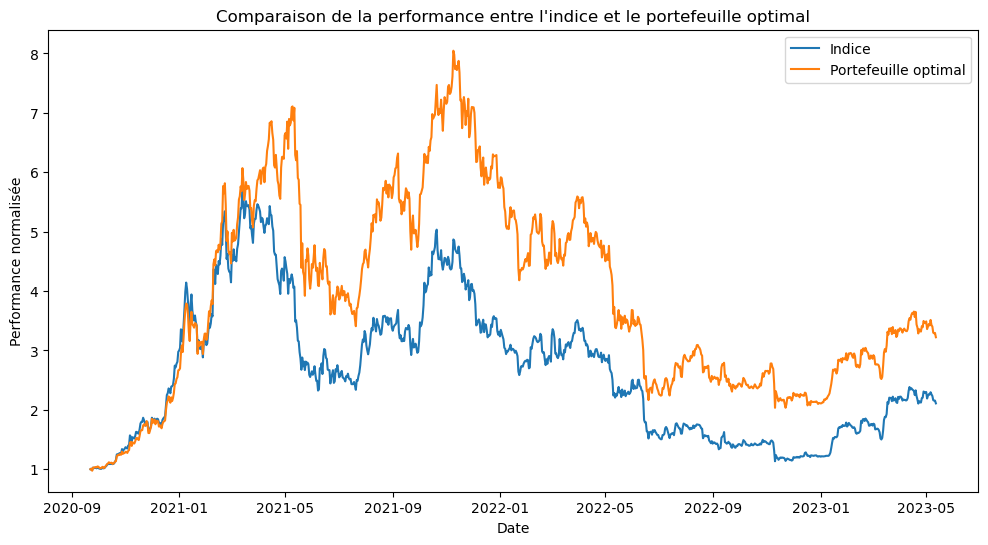

In [50]:
# Créer un DataFrame pour stocker les performances normalisées
normalized_performance = pd.DataFrame(index=crypto_prices.index)

# Normaliser la performance de l'indice
normalized_performance['indice'] = crypto_prices['indice'] / crypto_prices['indice'].iloc[0]

# Calculer la valeur du portefeuille optimal en utilisant les rendements pondérés
portfolio_value = (best_sharpe_weights * crypto_prices.drop(columns=['indice'])).sum(axis=1)

# Normaliser la performance du portefeuille optimal
normalized_performance['optimal_portfolio'] = portfolio_value / portfolio_value.iloc[0]

# Afficher les performances normalisées sur un graphique
plt.figure(figsize=(12, 6))
plt.plot(normalized_performance.index, normalized_performance['indice'], label='Indice')
plt.plot(normalized_performance.index, normalized_performance['optimal_portfolio'], label='Portefeuille optimal')
plt.xlabel('Date')
plt.ylabel('Performance normalisée')
plt.legend()
plt.title('Comparaison de la performance entre l\'indice et le portefeuille optimal')
plt.show()

In [51]:
# Calculer les rendements de l'indice
indice_returns = crypto_prices["indice"].pct_change().dropna()

# Ajouter les rendements de l'indice dans crypto_returns
crypto_returns['indice'] = indice_returns

In [52]:
crypto_returns

,BTC,ETH,BNB,XRP,ADA,DOGE,SOL,MATIC,DOT,TRX,LTC,AVAX,UNI,indice
time,,,,,,,,,,,,,,
2020-09-23 02:00:00,0.008436,0.007737,0.020980,0.006502,0.013390,0.009615,0.060049,0.036687,0.019220,0.002092,0.028764,0.000000,-0.089962,0.009343
2020-09-24 02:00:00,-0.028858,-0.066412,-0.050638,-0.053866,-0.059126,-0.039476,-0.035615,-0.096214,-0.036542,-0.008011,-0.034074,-0.339313,0.111156,-0.023105
2020-09-25 02:00:00,0.049174,0.086408,0.074878,0.054832,0.078026,0.036515,0.103906,0.069813,0.093055,0.052053,0.045122,0.310109,0.183210,0.042853
2020-09-26 02:00:00,-0.004152,0.007197,0.004389,0.036561,0.171711,0.024655,0.019450,0.006786,0.005265,0.039578,0.022277,0.028222,-0.044840,-0.009792
2020-09-27 02:00:00,0.005729,0.008340,0.063051,0.001138,-0.010910,0.000724,-0.017506,-0.010013,-0.016443,0.003750,0.004047,-0.037911,-0.008089,0.004949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-08 02:00:00,-0.009565,-0.002726,-0.001205,-0.015446,-0.005706,0.001557,0.000716,-0.009893,0.000852,-0.012812,0.004028,-0.008444,-0.000529,-0.011718
2023-05-09 02:00:00,-0.031969,-0.024241,-0.025961,-0.051404,-0.031594,-0.058074,-0.061164,-0.069323,-0.049622,-0.016654,-0.070891,-0.064771,-0.060184,-0.031866
2023-05-10 02:00:00,-0.003227,-0.001744,-0.005772,0.000905,-0.007012,0.008457,0.000014,-0.027139,-0.009637,0.010274,0.026009,-0.006729,-0.004982,-0.003478


In [53]:
# Calculer les rendements quotidiens du portefeuille optimal
optimal_portfolio_returns = portfolio_value.pct_change().dropna()

# Créer un DataFrame pour stocker les bêtas glissants d'un an
rolling_beta_optimal = pd.DataFrame(index=optimal_portfolio_returns.index, columns=['beta'])

# Calculer le bêta glissant d'un an pour le portefeuille optimal
window = 365  # Nombre de jours de trading dans un an
for i in range(window, len(optimal_portfolio_returns)):
    start = i - window
    end = i

    # Récupérer les rendements de l'indice et du portefeuille optimal pour la fenêtre glissante
    indice_returns_window = crypto_returns['indice'].iloc[start:end]
    optimal_portfolio_returns_window = optimal_portfolio_returns.iloc[start:end]

    # Calculer la covariance et la variance pour la fenêtre glissante
    covariance = np.cov(optimal_portfolio_returns_window, indice_returns_window)[0][1]
    indice_variance = np.var(indice_returns_window)

    # Calculer le bêta pour la fenêtre glissante
    beta = covariance / indice_variance

    # Ajouter le bêta au DataFrame
    rolling_beta_optimal.loc[optimal_portfolio_returns_window.index[-1], 'beta'] = beta 

# Afficher les premières lignes du DataFrame des bêtas glissants
print(rolling_beta_optimal.tail())


                         beta
time                         
2023-05-08 02:00:00  0.977399
2023-05-09 02:00:00  0.977629
2023-05-10 02:00:00  0.972665
2023-05-11 02:00:00  0.971849
2023-05-12 02:00:00       NaN


In [54]:
rolling_beta_optimal.min()

beta    0.915609
dtype: object

In [55]:
rolling_beta_optimal.mean()

beta    0.957973
dtype: float64

In [56]:
rolling_beta_optimal.max()

beta    1.013329
dtype: object

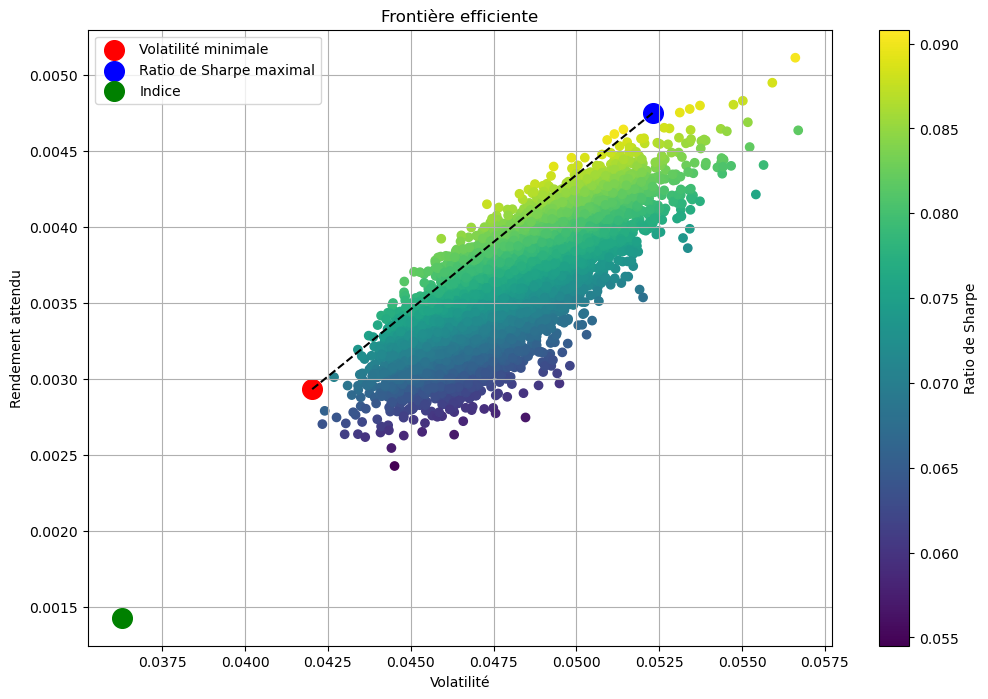

In [57]:
# Calculer le rendement et la volatilité de l'indice
indice_returns_annual = crypto_returns['indice'].mean()
indice_volatility_annual = crypto_returns['indice'].std()

# Tracer la frontière efficiente
plt.figure(figsize=(12, 8))
plt.scatter(results_df["Volatilité"], results_df["Rendement"], c=(results_df["Rendement"] / results_df["Volatilité"]), cmap='viridis')
plt.colorbar(label="Ratio de Sharpe")
plt.xlabel("Volatilité")
plt.ylabel("Rendement attendu")
plt.title("Frontière efficiente")

# Marquer le portefeuille à la volatilité minimale et le portefeuille ayant le ratio de Sharpe maximal
plt.scatter(min_volatility_portfolio["Volatilité"], min_volatility_portfolio["Rendement"], c='red', marker='o', s=200, label="Volatilité minimale")
plt.scatter(max_sharpe_portfolio["Volatilité"], max_sharpe_portfolio["Rendement"], c='blue', marker='o', s=200, label="Ratio de Sharpe maximal")

# Ajouter un point pour l'indice
plt.scatter(indice_volatility_annual, indice_returns_annual, c='green', marker='o', s=200, label="Indice")

# Tracer la ligne reliant les deux points
plt.plot([min_volatility_portfolio["Volatilité"], max_sharpe_portfolio["Volatilité"]], [min_volatility_portfolio["Rendement"], max_sharpe_portfolio["Rendement"]], linestyle='--', color='black')

plt.legend(loc="upper left")
plt.grid(True)
plt.show()


In [58]:
crypto_returns.mean()

BTC       0.001637
ETH       0.002840
BNB       0.004121
XRP       0.002643
ADA       0.003061
DOGE      0.008562
SOL       0.004708
MATIC     0.006795
DOT       0.002104
TRX       0.002212
LTC       0.002010
AVAX      0.003793
UNI       0.002270
indice    0.001428
dtype: float64

Calcul VaR (paramétrique impossible car les rendements ne sont pas normaux)

In [59]:
optimal_portfolio_returns

time
2020-09-23 02:00:00    0.009438
2020-09-24 02:00:00   -0.034156
2020-09-25 02:00:00    0.053949
2020-09-26 02:00:00   -0.001910
2020-09-27 02:00:00    0.008014
                         ...   
2023-05-08 02:00:00   -0.007014
2023-05-09 02:00:00   -0.030626
2023-05-10 02:00:00   -0.002972
2023-05-11 02:00:00    0.002051
2023-05-12 02:00:00   -0.022165
Length: 962, dtype: float64

In [60]:
import statsmodels.api as sm

# Assumons que 'optimal_portfolio_returns' est une série pandas avec les rendements du portefeuille optimal et 'crypto_returns['indice']' est une série pandas avec les rendements de l'indice du marché

# Ajouter une constante à la DataFrame
X = sm.add_constant(crypto_returns['indice'])

# Construire le modèle
model = sm.OLS(optimal_portfolio_returns, X)

# Ajuster le modèle
results = model.fit()

# Obtenir le beta (il sera le deuxième élément de la série 'params', car le premier est l'alpha)
beta = results.params[1]

# Afficher le résumé de la régression
print(results.summary())



                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     5081.
Date:                Sat, 13 May 2023   Prob (F-statistic):               0.00
Time:                        11:48:11   Log-Likelihood:                 2687.9
No. Observations:                 962   AIC:                            -5372.
Df Residuals:                     960   BIC:                            -5362.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0006      0.000      1.192      0.2

In [64]:
var_95_stock = Nasdaq_returns.quantile(0.05)
var_95_stock

-0.023677361484997828

In [65]:
stock_returns_monthly = Nasdaq_returns.resample('M').sum()
var_95_monthly_stock = stock_returns_monthly.quantile(0.05)

var_95_monthly_stock

-0.08987482976296061

In [66]:
#Calcul Var historique 95% journalier
var_95 = optimal_portfolio_returns.quantile(0.05)
var_95

-0.05884152944126929

In [67]:
# Convertir les rendements journaliers en rendements mensuels
optimal_portfolio_returns_monthly = optimal_portfolio_returns.resample('M').sum()

# Calculer la VaR historique à 95% pour les rendements mensuels
var_95_monthly = optimal_portfolio_returns_monthly.quantile(0.05)

var_95_monthly

-0.27459296752391293

In [68]:
# Nombre de scénarios à générer
n_scenarios = 100000

# Durée de la période de risque (en jours)
risk_period = 1

# Moyenne et écart-type des rendements journaliers
mean_daily_return = optimal_portfolio_returns.mean()
std_dev_daily_return = optimal_portfolio_returns.std()

# Générer les scénarios de rendements à l'aide de la distribution normale
simulated_returns = np.random.normal(mean_daily_return * risk_period, 
                                     std_dev_daily_return * np.sqrt(risk_period), 
                                     n_scenarios)

# Calculer les valeurs finales du portefeuille pour chaque scénario
initial_portfolio_value = 1  # suppose un investissement initial de 1
final_portfolio_values = initial_portfolio_value * np.exp(simulated_returns)

# Calculer la VaR à 95% en tant que perte correspondant au 5e percentile de la distribution des valeurs finales
VaR_95 = -(1 - np.percentile(final_portfolio_values, 5))
VaR_95

-0.0572902049460533

In [131]:
# Nombre de scénarios à générer
n_scenarios = 10000

# Durée de la période de risque (en jours)
risk_period = 30

# Moyenne et écart-type des rendements journaliers
mean_daily_return = optimal_portfolio_returns.mean()
std_dev_daily_return = optimal_portfolio_returns.std()

# Générer les scénarios de rendements à l'aide de la distribution normale
simulated_returns = np.random.normal(mean_daily_return * risk_period, 
                                     std_dev_daily_return * np.sqrt(risk_period), 
                                     n_scenarios)

# Calculer les valeurs finales du portefeuille pour chaque scénario
initial_portfolio_value = 1  # suppose un investissement initial de 1
final_portfolio_values = initial_portfolio_value * np.exp(simulated_returns)

# Calculer la VaR à 95% en tant que perte correspondant au 5e percentile de la distribution des valeurs finales
VaR_95 = -(1 - np.percentile(final_portfolio_values, 5))
VaR_95

-0.24671679416799108

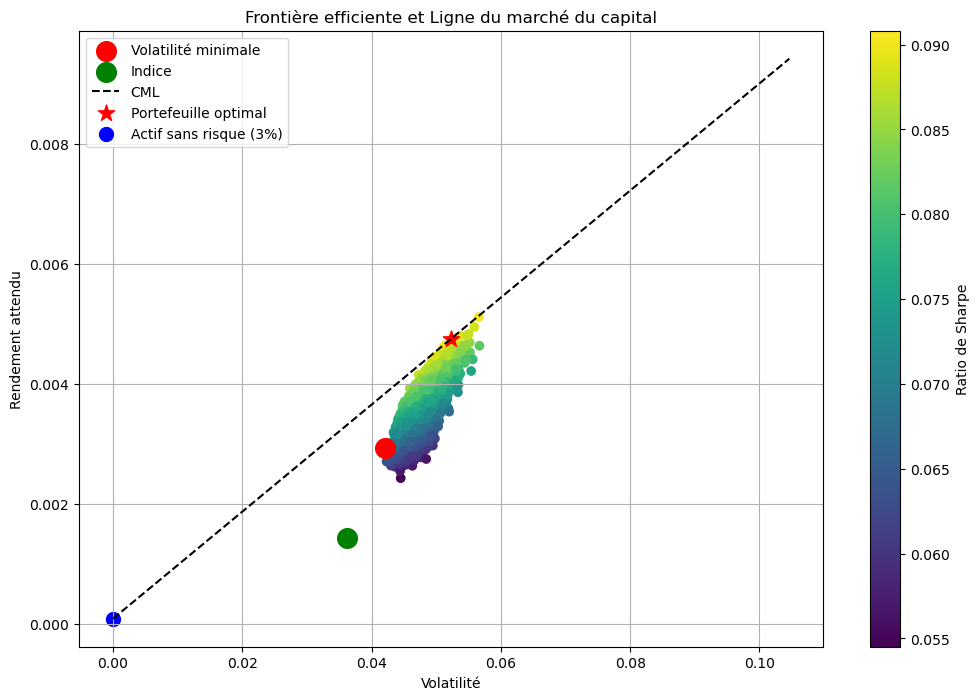

In [69]:
# Figure size
plt.figure(figsize=(12, 8))

# Efficient frontier
plt.scatter(results_df["Volatilité"], results_df["Rendement"], c=(results_df["Rendement"] / results_df["Volatilité"]), cmap='viridis')
plt.colorbar(label="Ratio de Sharpe")

# Minimum volatility portfolio
plt.scatter(min_volatility_portfolio["Volatilité"], min_volatility_portfolio["Rendement"], c='red', marker='o', s=200, label="Volatilité minimale")

# Crypto index
plt.scatter(indice_volatility_annual, indice_returns_annual, c='green', marker='o', s=200, label="Indice")

# Capital Market Line
plt.plot(volatilities, cml_returns, linestyle="--", color="black", label="CML")

# Optimal portfolio
plt.scatter(optimal_portfolio_volatility, optimal_portfolio_return, marker="*", color="red", s=150, label="Portefeuille optimal")

# Risk-free asset
plt.scatter(0, risk_free_rate, marker="o", color="blue", s=100, label="Actif sans risque (3%)")

# Chart settings
plt.xlabel("Volatilité")
plt.ylabel("Rendement attendu")
plt.title("Frontière efficiente et Ligne du marché du capital")
plt.legend(loc="upper left")
plt.grid(True)

# Show the plot
plt.show()


In [70]:
num_portfolios = 10000
num_assets = len(crypto_returns.columns) - 1  # -1 to exclude the 'indice' column

# Initialize arrays to hold portfolio returns, volatilities, and weights
portfolio_returns = np.zeros(num_portfolios)
portfolio_volatilities = np.zeros(num_portfolios)
portfolio_weights = np.zeros((num_portfolios, num_assets))

# Generate random portfolios
for i in range(num_portfolios):
    # Generate random weights that sum to 1
    weights = np.random.uniform(-1, 1, num_assets)  # modified this line
    weights /= np.sum(np.abs(weights))  # modified this line
    
    # Calculate portfolio return and volatility
    portfolio_returns[i] = np.sum(crypto_returns.iloc[:, :-1].mean() * weights)
    portfolio_volatilities[i] = np.sqrt(np.dot(weights.T, np.dot(crypto_returns.iloc[:, :-1].cov(), weights)))
    
    # Save weights
    portfolio_weights[i, :] = weights

# Create a DataFrame with the results
portfolios_df = pd.DataFrame({'Rendement': portfolio_returns, 'Volatilité': portfolio_volatilities})

for i, symbol in enumerate(crypto_returns.columns[:-1]):
    portfolios_df[symbol+' poids'] = portfolio_weights[:, i]


In [71]:
portfolios_df

,Rendement,Volatilité,BTC poids,ETH poids,BNB poids,XRP poids,ADA poids,DOGE poids,SOL poids,MATIC poids,DOT poids,TRX poids,LTC poids,AVAX poids,UNI poids
0,-0.000633,0.022746,-0.028075,-0.126538,-0.014417,0.060276,-0.036225,-0.147079,0.152175,-0.071061,0.026422,0.101071,0.123103,0.089027,-0.024532
1,0.001235,0.024282,0.040645,0.103598,0.089651,-0.075569,0.119031,-0.096822,0.115092,0.090024,-0.076272,0.043493,0.099256,-0.002993,-0.047554
2,0.001370,0.019608,0.067090,0.090080,-0.109556,-0.001357,-0.087975,0.044747,0.128976,0.063580,0.075077,0.056804,0.110167,0.028935,-0.135655
3,-0.001546,0.025004,-0.075272,0.125548,-0.042637,-0.086229,-0.013861,0.046322,0.026452,-0.206009,0.053656,0.072742,-0.062463,-0.114672,-0.074138
4,-0.000971,0.028051,0.021770,-0.035550,0.009851,-0.002098,0.103595,0.104076,-0.035212,-0.162644,0.070851,-0.135896,-0.085390,-0.016897,-0.216171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.000799,0.017612,0.034038,-0.065981,-0.130519,-0.027270,0.040835,0.106448,-0.013239,0.103447,-0.164794,-0.111092,0.116588,0.017991,0.067758
9996,0.000723,0.013326,0.119451,0.107507,-0.121399,-0.053370,-0.135328,0.013512,0.008632,0.100377,-0.093299,0.067934,0.034721,0.057801,0.086669
9997,0.000167,0.017184,-0.054715,0.084506,0.047061,0.059000,-0.126469,-0.084925,0.134661,0.072490,-0.110164,-0.105231,0.086315,-0.021864,0.012598
9998,-0.001478,0.021146,-0.078920,0.036157,-0.089139,0.119551,-0.111450,-0.077920,0.128521,-0.133659,-0.024404,0.006315,-0.039989,0.062498,-0.091477


In [72]:
# Rendement sans risque (en décimal)
risk_free_rate = 0.03/365

# Ajouter une colonne pour le ratio de Sharpe
portfolios_df['Sharpe Ratio'] = (portfolios_df['Rendement'] - risk_free_rate) / portfolios_df['Volatilité']


Autorisation des positions short dans le portefeuille

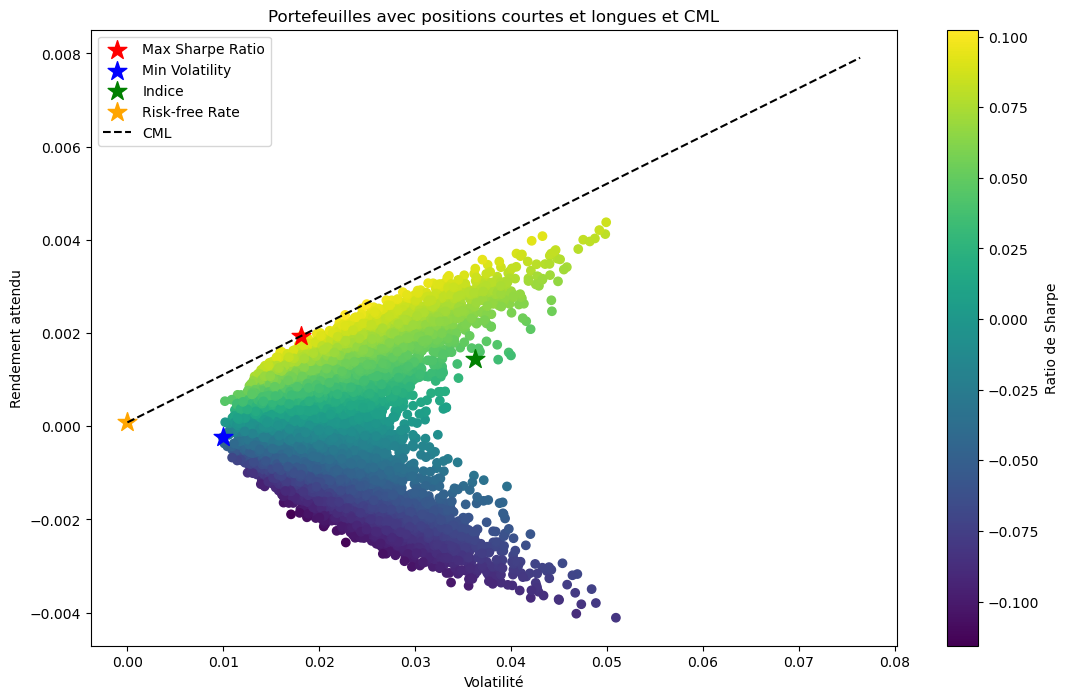

In [136]:
# Rendement et volatilité de l'indice
indice_return = crypto_returns['indice'].mean()
indice_volatility = crypto_returns['indice'].std()

# Taux sans risque (en décimal)
risk_free_rate = 0.03 / 365

# Définir la taille de la figure
plt.figure(figsize=(13, 8))

# Tracer les portefeuilles simulés
plt.scatter(portfolios_df['Volatilité'], portfolios_df['Rendement'], c=portfolios_df['Sharpe Ratio'], cmap='viridis')
plt.colorbar(label='Ratio de Sharpe')

# Ajouter un point rouge pour le portefeuille avec le ratio de Sharpe maximal
max_sharpe_portfolio = portfolios_df.iloc[portfolios_df['Sharpe Ratio'].idxmax()]
plt.scatter(max_sharpe_portfolio['Volatilité'], max_sharpe_portfolio['Rendement'], color='r', s=200, marker='*', label='Max Sharpe Ratio')

# Ajouter un point bleu pour le portefeuille à volatilité minimale
min_volatility_portfolio = portfolios_df.iloc[portfolios_df['Volatilité'].idxmin()]
plt.scatter(min_volatility_portfolio['Volatilité'], min_volatility_portfolio['Rendement'], color='b', s=200, marker='*', label='Min Volatility')

# Ajouter un point vert pour l'indice
plt.scatter(indice_volatility, indice_return, color='g', s=200, marker='*', label='Indice')

# Ajouter un point orange pour le rendement sans risque
plt.scatter(0, risk_free_rate, color='orange', s=200, marker='*', label='Risk-free Rate')

# Calculer la pente de la ligne
slope = (max_sharpe_portfolio['Rendement'] - risk_free_rate) / max_sharpe_portfolio['Volatilité']

# Créer une gamme de volatilités pour la CML, allant de 0 à une valeur supérieure à la volatilité maximale observée
volatilities = np.linspace(0, max(portfolios_df['Volatilité'])*1.5, 100)

# Calculer les rendements correspondants pour la CML
cml_returns = risk_free_rate + slope * volatilities

# Tracer la CML
plt.plot(volatilities, cml_returns, linestyle="--", color="black", label="CML")




plt.xlabel('Volatilité')
plt.ylabel('Rendement attendu')
plt.title('Portefeuilles avec positions courtes et longues et CML')
plt.legend()
plt.show()


In [73]:
num_portfolios = 10000
num_assets = len(crypto_returns.columns) - 1  # -1 to exclude the 'indice' column

# Initialize arrays to hold portfolio returns, volatilities, and weights
portfolio_returns = np.zeros(num_portfolios)
portfolio_volatilities = np.zeros(num_portfolios)
portfolio_weights = np.zeros((num_portfolios, num_assets))

# Generate random portfolios
for i in range(num_portfolios):
    # Generate random weights that sum to 1
    weights = np.random.uniform(0, 1, num_assets)  # modified this line to generate weights between 0 and 1
    weights /= np.sum(weights)  # normalize weights so they sum to 1
    
    # Calculate portfolio return and volatility
    portfolio_returns[i] = np.sum(crypto_returns.iloc[:, :-1].mean() * weights)
    portfolio_volatilities[i] = np.sqrt(np.dot(weights.T, np.dot(crypto_returns.iloc[:, :-1].cov(), weights)))
    
    # Save weights
    portfolio_weights[i, :] = weights

# Create a DataFrame with the results
portfolios_df = pd.DataFrame({'Rendement': portfolio_returns, 'Volatilité': portfolio_volatilities})

for i, symbol in enumerate(crypto_returns.columns[:-1]):
    portfolios_df[symbol+' poids'] = portfolio_weights[:, i]


In [74]:
# Rendement sans risque (en décimal)
risk_free_rate = 0.03/365

# Ajouter une colonne pour le ratio de Sharpe
portfolios_df['Sharpe Ratio'] = (portfolios_df['Rendement'] - risk_free_rate) / portfolios_df['Volatilité']

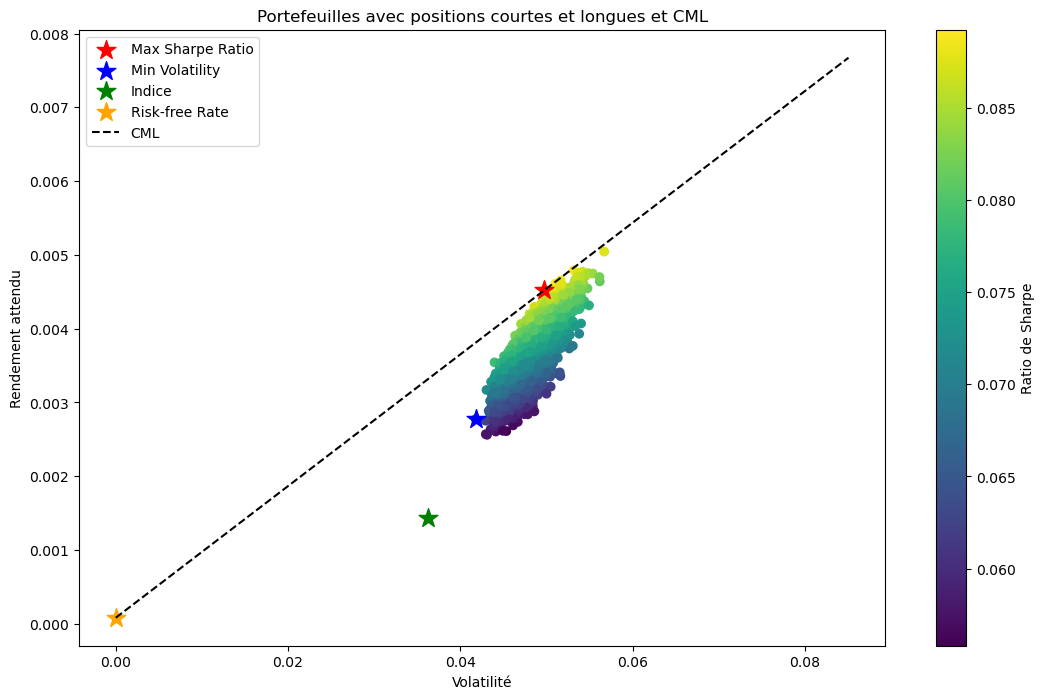

In [75]:
# Rendement et volatilité de l'indice
indice_return = crypto_returns['indice'].mean()
indice_volatility = crypto_returns['indice'].std()

# Taux sans risque (en décimal)
risk_free_rate = 0.03 / 365

# Définir la taille de la figure
plt.figure(figsize=(13, 8))

# Tracer les portefeuilles simulés
plt.scatter(portfolios_df['Volatilité'], portfolios_df['Rendement'], c=portfolios_df['Sharpe Ratio'], cmap='viridis')
plt.colorbar(label='Ratio de Sharpe')

# Ajouter un point rouge pour le portefeuille avec le ratio de Sharpe maximal
max_sharpe_portfolio = portfolios_df.iloc[portfolios_df['Sharpe Ratio'].idxmax()]
plt.scatter(max_sharpe_portfolio['Volatilité'], max_sharpe_portfolio['Rendement'], color='r', s=200, marker='*', label='Max Sharpe Ratio')

# Ajouter un point bleu pour le portefeuille à volatilité minimale
min_volatility_portfolio = portfolios_df.iloc[portfolios_df['Volatilité'].idxmin()]
plt.scatter(min_volatility_portfolio['Volatilité'], min_volatility_portfolio['Rendement'], color='b', s=200, marker='*', label='Min Volatility')

# Ajouter un point vert pour l'indice
plt.scatter(indice_volatility, indice_return, color='g', s=200, marker='*', label='Indice')

# Ajouter un point orange pour le rendement sans risque
plt.scatter(0, risk_free_rate, color='orange', s=200, marker='*', label='Risk-free Rate')

# Calculer la pente de la ligne
slope = (max_sharpe_portfolio['Rendement'] - risk_free_rate) / max_sharpe_portfolio['Volatilité']

# Créer une gamme de volatilités pour la CML, allant de 0 à une valeur supérieure à la volatilité maximale observée
volatilities = np.linspace(0, max(portfolios_df['Volatilité'])*1.5, 100)

# Calculer les rendements correspondants pour la CML
cml_returns = risk_free_rate + slope * volatilities

# Tracer la CML
plt.plot(volatilities, cml_returns, linestyle="--", color="black", label="CML")




plt.xlabel('Volatilité')
plt.ylabel('Rendement attendu')
plt.title('Portefeuilles avec positions courtes et longues et CML')
plt.legend()
plt.show()


Recherche du portefeuille optimisant la VaR via un programme

Composition du portefeuille optimal :
       Poids
BTC    57.19
ETH     0.00
BNB    25.49
XRP     0.00
ADA     4.62
DOGE    0.00
SOL     0.00
MATIC   0.00
DOT     0.00
TRX     4.85
LTC     0.94
AVAX    6.92
UNI     0.00


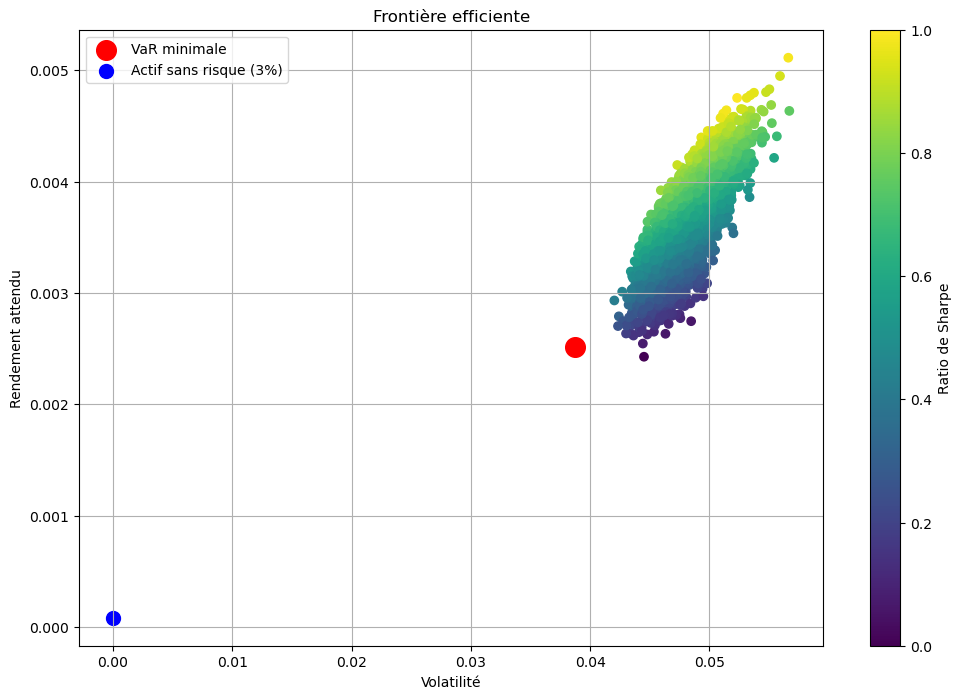

In [77]:
crypto_returns=crypto_returns.drop(['indice'], axis=1)

from scipy.optimize import minimize

# Fonction pour calculer la VaR
def calculate_var(weights, returns, alpha=0.05):
    portfolio_returns = np.dot(returns, weights)
    var = np.percentile(portfolio_returns, 100 * alpha)
    return var

# Fonction pour minimiser (négatif car nous voulons maximiser)
def minimize_var(weights):
    return -calculate_var(weights, crypto_returns)

# Contraintes et limites
cons = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
bounds = tuple((0, 1) for asset in range(num_cryptos))

# Optimisation
initial_guess = num_cryptos * [1. / num_cryptos,]
optimal_var_results = minimize(minimize_var, initial_guess, method='SLSQP', bounds=bounds, constraints=cons)

# Créer un DataFrame avec la composition du portefeuille optimal
optimal_var_portfolio = pd.DataFrame(data=optimal_var_results.x, index=crypto_returns.columns, columns=["Poids"])
optimal_var_portfolio["Poids"] = optimal_var_portfolio["Poids"].apply(lambda x: round(x * 100, 2))  # Convertir les poids en pourcentages

print("Composition du portefeuille optimal :")
print(optimal_var_portfolio)

# Calculer le rendement et la volatilité du portefeuille optimal
optimal_var_return = np.sum(mean_returns * optimal_var_results.x)
optimal_var_volatility = np.sqrt(np.dot(optimal_var_results.x.T, np.dot(cov_matrix, optimal_var_results.x)))

# Tracer le portefeuille optimal
plt.figure(figsize=(12, 8))
plt.scatter(results_df["Volatilité"], results_df["Rendement"], c=(results_df["Rendement"] / results_df["Volatilité"]), cmap='viridis')
plt.scatter(optimal_var_volatility, optimal_var_return, c='red', marker='o', s=200, label="VaR minimale")
# Ajouter le point correspondant à l'actif sans risque
plt.scatter(0, risk_free_rate, marker="o", color="blue", s=100, label="Actif sans risque (3%)")
plt.colorbar(label="Ratio de Sharpe")
plt.xlabel("Volatilité")
plt.ylabel("Rendement attendu")
plt.title("Frontière efficiente")
plt.legend(loc="upper left")
plt.grid(True)
plt.show()
